**Kullanacağımız kütüphaneleri import ediyoruz**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("adult_eda.csv")

In [3]:
df.head()

#verisetinin ilk 5 satırını inceliyoruz

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [6]:
df.duplicated().value_counts()

#verisetinde duplicate yani tekrar eden verileri tesbit ediyoruz

False    32537
True        24
dtype: int64

In [7]:
df.drop_duplicates(keep = 'first', inplace =True)

#duplicate dataları drop ediyoruz. Çünkü analizi yaparken fark etmeden datayı manipüle etmesine neden olabiliriz

In [8]:
df.shape

(32537, 15)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.000,38.586,13.638,17.000,28.000,37.000,48.000,90.000
fnlwgt,32537.000,189780.849,105556.471,12285.000,117827.000,178356.000,236993.000,1484705.000
education-num,31735.000,10.084,2.575,1.000,9.000,10.000,12.000,16.000
capital-gain,32537.000,1078.444,7387.957,0.000,0.000,0.000,0.000,99999.000
capital-loss,32537.000,87.368,403.102,0.000,0.000,0.000,0.000,4356.000
hours-per-week,32537.000,40.440,12.347,1.000,40.000,40.000,45.000,99.000


In [10]:

df.rename(columns = {"education-num": "education_num",
                    "marital-status": "marital_status",
                    "capital-gain": "capital_gain",
                    "capital-loss": "capital_loss",
                    "native-country": "native_country",
                    "sex": "gender"}, 
         inplace = True)

#column isimlendirmeleri verinin analizi sırasında bize zorluk çıkarabilir bu yüzden columnnameleri uygun hale getiriyoruz

In [11]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
gender               0
capital_gain         0
capital_loss         0
hours-per-week       0
native_country       0
salary               0
dtype: int64

In [12]:
df.isnull().sum().sum()

5866

In [13]:
df.isnull().sum() / df.shape[0] * 100

age               0.000
workclass         0.000
fnlwgt            0.000
education         0.000
education_num     2.465
marital_status    0.000
occupation        0.000
relationship     15.564
race              0.000
gender            0.000
capital_gain      0.000
capital_loss      0.000
hours-per-week    0.000
native_country    0.000
salary            0.000
dtype: float64

**2.Look at the value counts of columns that have object data type and detect strange values apart from the NaN Values**

Yukarıda null değerleri tesbit ettik ancak null değerlerin tesbiti ssayısal verilerde kolayken object verilerde karmaşık 
olabilir. Yani object veri tibindeki missing value ların tesbiti için aşağıdaki yolu izliyoruz 

In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours-per-week', 'native_country',
       'salary'],
      dtype='object')

In [15]:
df.describe(include = "object").T

,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital_status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,27473,5,Husband,13187
race,32537,5,White,27795
gender,32537,2,Male,21775
native_country,32537,42,United-States,29153
salary,32537,2,<=50K,24698


In [16]:
object_col = df.select_dtypes(include = "object").columns
#verisetindeki object veritipindeki sütunları object_col değişkenine atadık
object_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'salary'],
      dtype='object')

In [17]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna = False))
    print("--"*20)

workclass
----------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
education
----------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
----------------------------------------
marital_status
----------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418


In [18]:
df[df.isin(['?'])].any()

#bir önceki satırda for döngüsüyle veri setindeki object veri tipindeki sütunların verilerini inceledik ve ? şeklinde bir ifadeyle
#karşılaştık. Bu ifadenin birden fazla oluşu ve tekrar ettiği sütunların ve bağlı olan diğer sütunların arasındaki ilşkiyi kurmadan önce
#hangi sütunlarda oladuğunun tesbitini yapıyorz


age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
gender            False
capital_gain      False
capital_loss      False
hours-per-week    False
native_country     True
salary            False
dtype: bool

**Salary (Target Attribute)**

**Let's check the number of people at each "salary" level and visualize it with a number graph**

In [19]:
df.salary.value_counts(dropna = False)



<=50K    24698
>50K      7839
Name: salary, dtype: int64

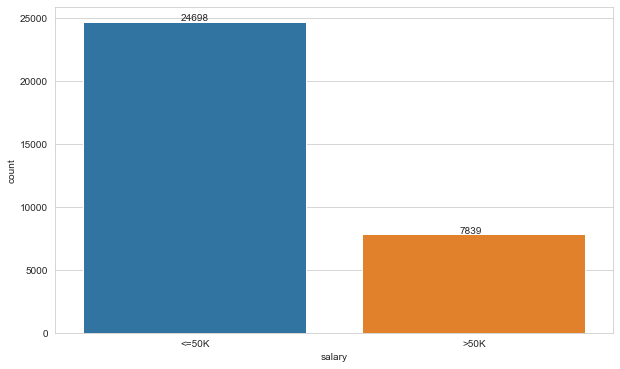

In [20]:
fig , ax = plt.subplots()

ax = sns.countplot(data = df, x = 'salary')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() + 0.35, p.get_height() + 100));

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

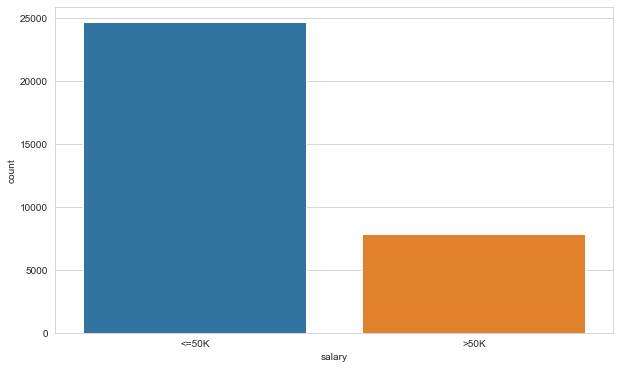

In [22]:
fig, ax = plt.subplots()

ax = sns.countplot(data=df, x="salary")

for container in ax.containers:
    ax.bar_label(container);

In [23]:
df.salary.value_counts(normalize=True)

<=50K   0.759
>50K    0.241
Name: salary, dtype: float64

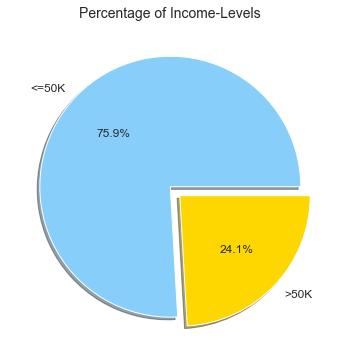

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=df.salary.value_counts().values, 
       labels=['<=50K', '>50K'], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
       )
plt.title("Percentage of Income-Levels", fontdict = {'fontsize': 14})
plt.show()

 
**Result :** Veri setindeki bireylerin %75'i düşük gelir seviyesinde iken, %25'i yüksek gelir seviyesindedir.

# Numeric Features
**age**


Eksterem değerleri görümek için boxplot kullandık

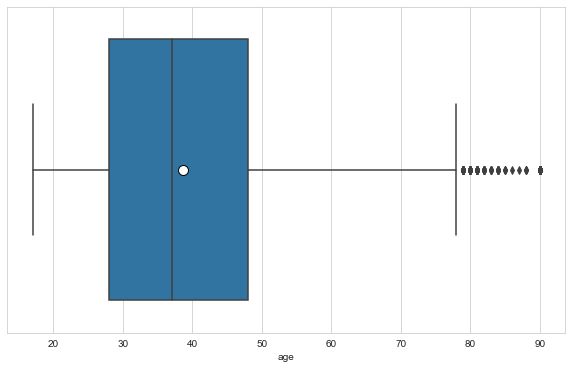

In [25]:
sns.boxplot(data=df, 
            x="age",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

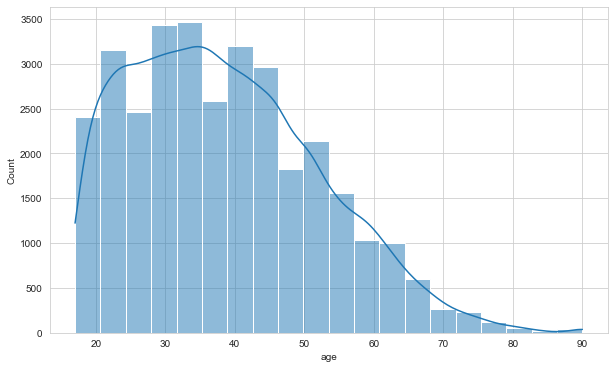

In [26]:
sns.histplot(data=df, x="age", bins=20, kde=True);

#Eksterem değerleri görümek için hisplot kullandıkyaşa göre sayıların dağılımı görmek için hisplot (kde) kullandık 

In [27]:
df.age.describe()

#istatistiksel özelliklerini inceliyoruz

count   32537.000
mean       38.586
std        13.638
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

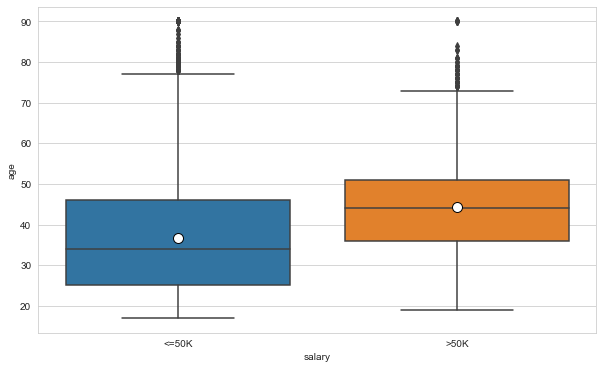

In [28]:
sns.boxplot(data=df, 
            x="salary", 
            y="age",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

#yaşın ve maaşın birbiriyle ilişkisini gözlemleyebiliyoruz. Yaşı daha büyük olan kişilerin daha yüksek maai aldığını görüyoruz

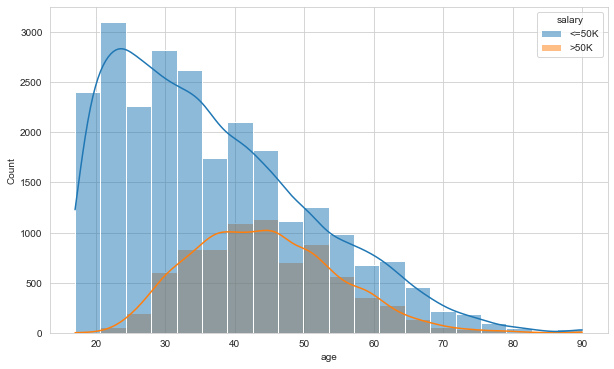

In [29]:
sns.histplot(data=df, x="age", bins= 20, kde=True, hue="salary");

#yaş ve maai ilişkisinin histogramdaki görüntüsünü de inceleyebiliriz


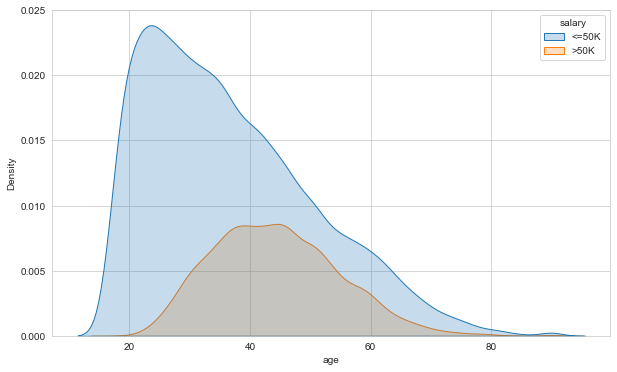

In [30]:
sns.kdeplot(data=df, x="age", hue="salary", fill=True); 


In [31]:
df.groupby("salary").age.describe()

#group by fonksiyonuyla maaşları gruplandırıyoruz. 50k üstü ya da 50k altı olarak istatistiksel olarak inceleyebiliyoruz

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,36.787,14.017,17.000,25.000,34.000,46.000,90.000
>50K,7839.000,44.251,10.520,19.000,36.000,44.000,51.000,90.000


**Sonuç :** Yüksek gelir grubunun yaş ortalaması ve medyanı düşük gelir grubuna göre daha yüksektir. Bu, yaşlı neslin gençlerden daha fazla servete sahip olduğu anlamına gelir.

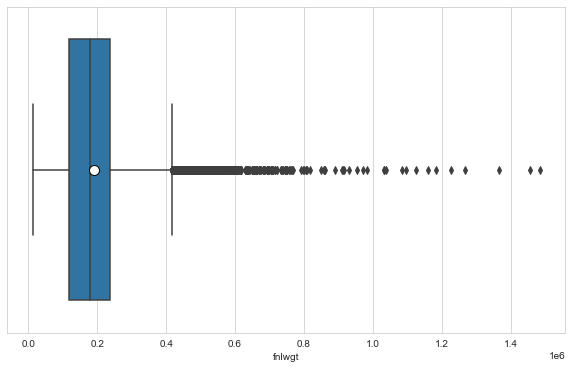

In [32]:
sns.boxplot(data=df, 
            x="fnlwgt",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

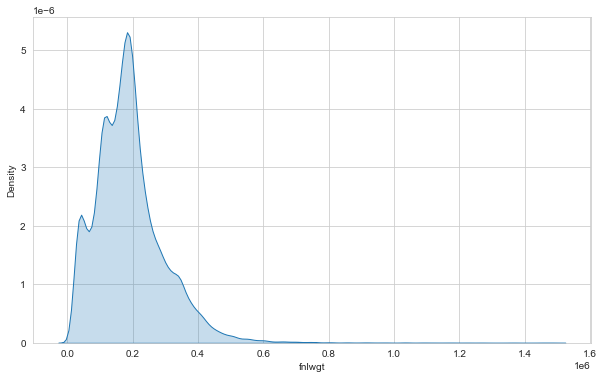

In [33]:
sns.kdeplot(data=df, x="fnlwgt", fill=True);

In [34]:
df.fnlwgt.describe()

count     32537.000
mean     189780.849
std      105556.471
min       12285.000
25%      117827.000
50%      178356.000
75%      236993.000
max     1484705.000
Name: fnlwgt, dtype: float64

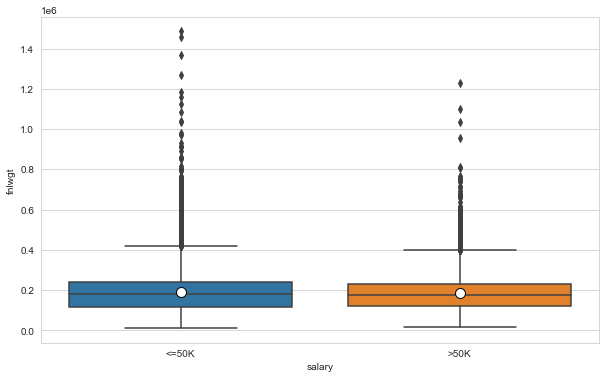

In [35]:
sns.boxplot(data=df, 
            x="salary", 
            y="fnlwgt",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

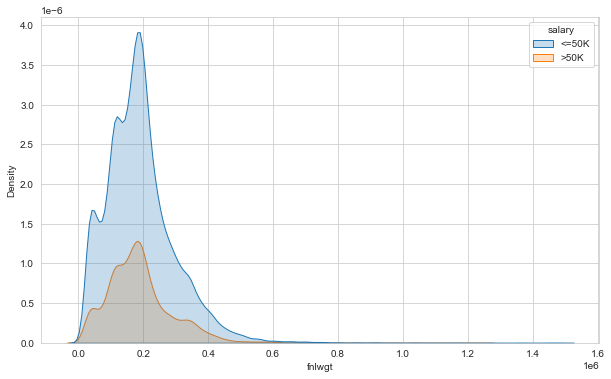

In [36]:
sns.kdeplot(data=df, x="fnlwgt", hue="salary", fill=True);

In [37]:
df.groupby("salary").fnlwgt.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,190345.927,106487.413,12285.000,117606.000,179465.000,238968.250,1484705.000
>50K,7839.000,188000.481,102554.464,14878.000,119100.000,176063.000,230969.000,1226583.000


**Sonuç :** “fnlwgt” feature için yüksek ve düşük gelirli gruplar arasında anlamlı bir fark yoktur.

**capital gain**

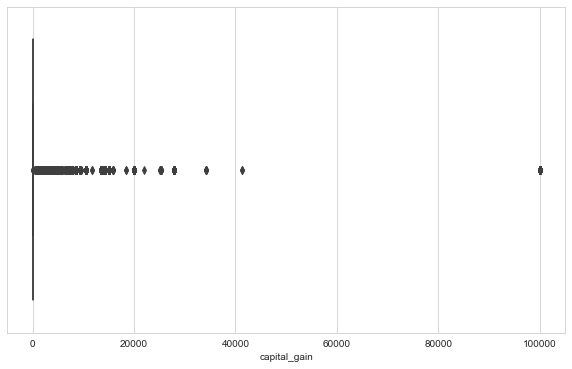

In [38]:
sns.boxplot(data=df, x="capital_gain");

#ekstreme değerlerini görüyoruz

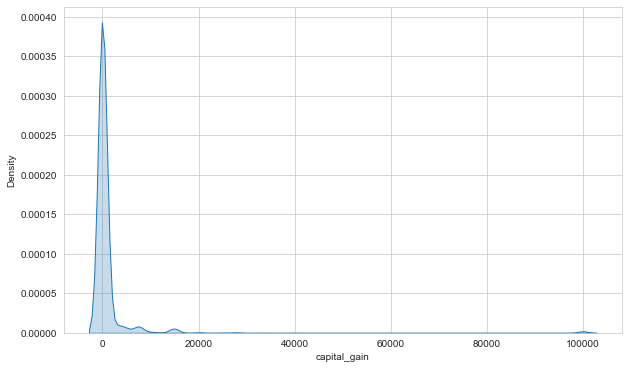

In [39]:
sns.kdeplot(data=df, x="capital_gain", fill=True);

#capital gain için ilave gelir gibi düşünebiliriz capital gain alan kişi sayısı da görüldüğü üzere azdır

In [40]:
df.capital_gain.describe()

count   32537.000
mean     1078.444
std      7387.957
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital_gain, dtype: float64

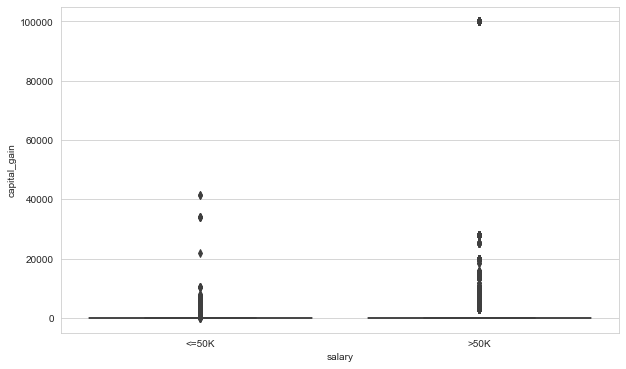

In [41]:
sns.boxplot(data=df, x="salary", y="capital_gain");

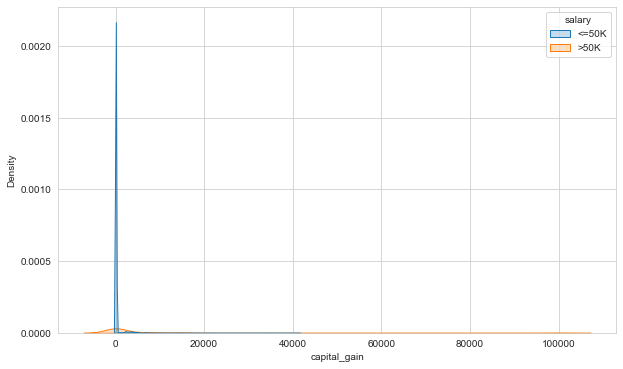

In [42]:
sns.kdeplot(data=df, x="capital_gain", hue="salary", fill=True);

In [43]:
df.groupby("salary").capital_gain.describe()

#capital gain için sağlıklı çıkarımlar yapmak istiyoruz. Dolayısıyla istatistiksel olarak sonuçlarına baktığımızdaa 
#50k üzeri geliri olan kişilerin capital gain sahibi olduğunu (mean değeri için) yani yatırım yapıp "örneğin bir mülk alıp kiraya
#vermek gibi düşünebiiliriz" gibi bir çıkarım yapıyoruz

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,148.885,963.558,0.000,0.000,0.000,0.000,41310.000
>50K,7839.000,4007.165,14572.097,0.000,0.000,0.000,0.000,99999.000


In [44]:
df[df.capital_gain != 0].groupby("salary").capital_gain.describe()

#yukarıdaki describe sonucunda çıkan sitatistiksel verilerin %25 %75 vs gibi sonuçlarında 0 sonucunu görüyoruz.
#Bunun veriyi ve bizim analizimizi manipüle etmemesi için 0 olan sonuçları hariç tutarak bir inceleme yapalım


,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,1035.000,3552.813,3173.419,114.000,2202.000,3273.000,4101.000,41310.000
>50K,1677.000,18731.165,26778.676,3103.000,7298.000,7896.000,15024.000,99999.000


**Sonuç :** Capital_gain sahibi olanların yüksek gelirli kişiler oılduğu sonucuna varabiliriz

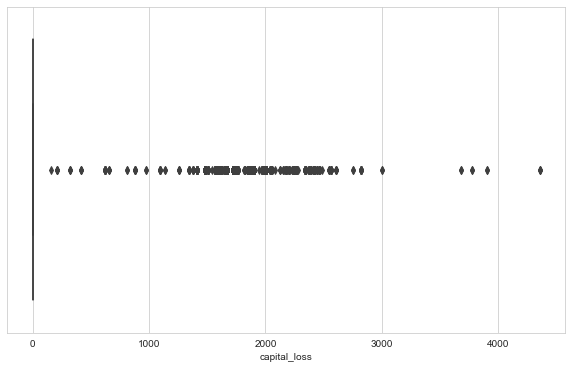

In [45]:
sns.boxplot(data=df, x="capital_loss");

**capital_loss**

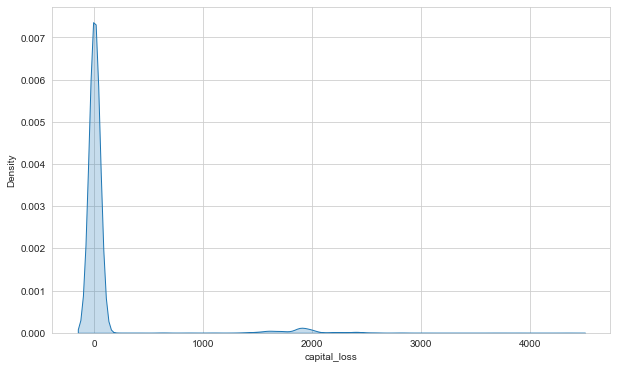

In [46]:
sns.kdeplot(data=df, x="capital_loss", fill=True);

In [47]:
df.capital_loss.describe()

#capitaloss için de 0 sonuçlu değerler var

count   32537.000
mean       87.368
std       403.102
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4356.000
Name: capital_loss, dtype: float64

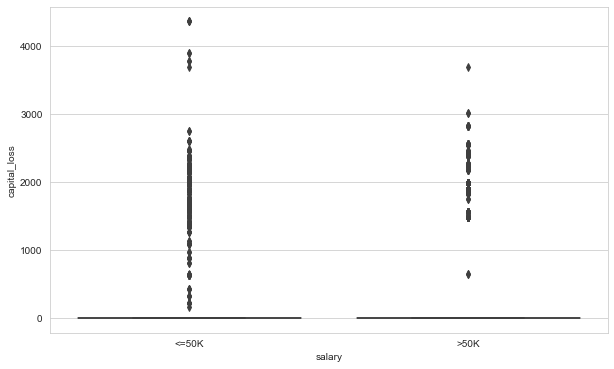

In [48]:
sns.boxplot(data=df, x="salary", y="capital_loss");

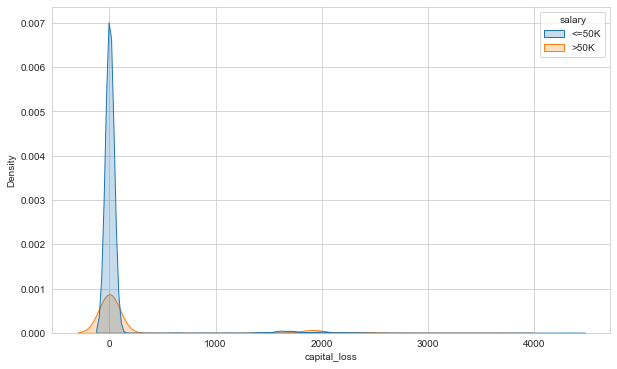

In [49]:
sns.kdeplot(data=df, x="capital_loss", hue="salary", fill=True);

In [50]:

df.groupby("salary").capital_loss.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,53.190,310.890,0.000,0.000,0.000,0.000,4356.000
>50K,7839.000,195.051,595.555,0.000,0.000,0.000,0.000,3683.000


In [51]:
df[df.capital_loss != 0].groupby("salary").capital_loss.describe()

#0 ı görmezden gelerek bir analiz yapmaya çalışıyoruz

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,746.000,1760.983,438.906,155.000,1590.000,1721.000,1980.000,4356.000
>50K,773.000,1978.017,264.144,653.000,1887.000,1902.000,1977.000,3683.000


**Sonuç :** capital_loss için yüksek veya düşük gelirli gruplarda gözle görülür anlamlı bir fark göremiyoruz

**hours-per-week**

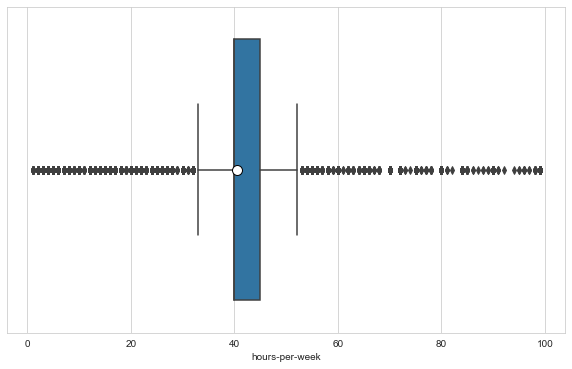

In [54]:
sns.boxplot(data=df, 
            x="hours-per-week",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

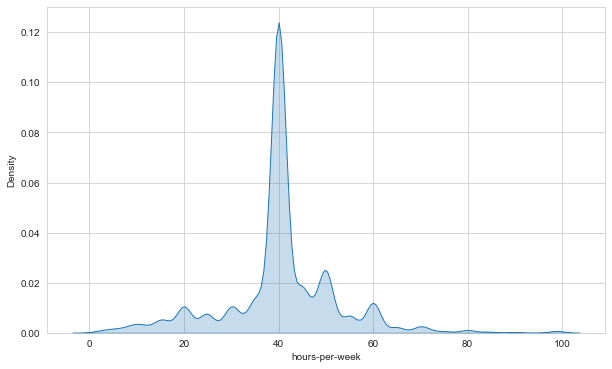

In [57]:
sns.kdeplot(data=df, x="hours-per-week", fill=True);

In [60]:
df.rename(columns = {'hours-per-week':'hours_per_week'}, inplace = True)

In [61]:
df.hours_per_week.describe()

#haftalık çalışma saatlerini istatistiksel olarak inceliyoruz

#max saatin 99 olduğunu görüyoruz. Peki bu kişinin gelir seviyesi ne olabilir ? yani çalışma saatleri ile gelir seviyesi 
#ilişkisini inceleyelim

count   32537.000
mean       40.440
std        12.347
min         1.000
25%        40.000
50%        40.000
75%        45.000
max        99.000
Name: hours_per_week, dtype: float64

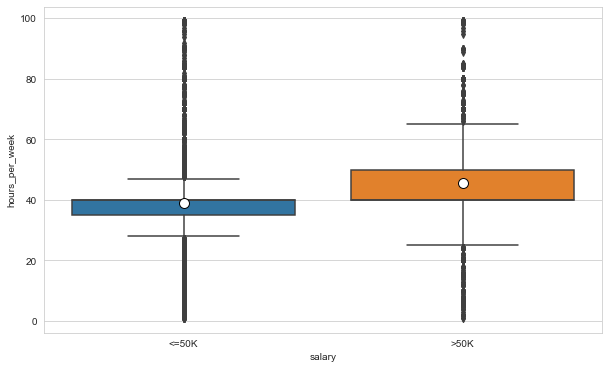

In [62]:
sns.boxplot(data=df, 
            x="salary", 
            y="hours_per_week",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});     

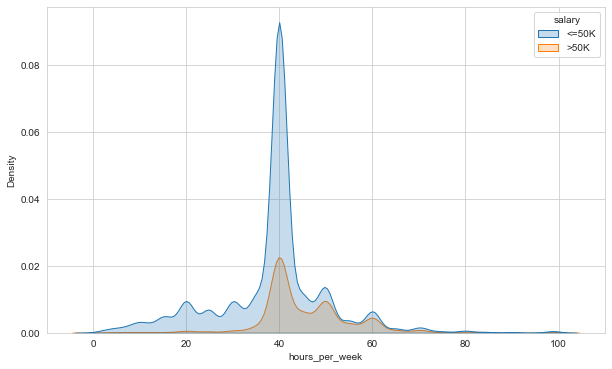

In [63]:
sns.kdeplot(data=df, x="hours_per_week", hue="salary", fill=True);

In [64]:
df.groupby("salary").hours_per_week.describe()

#yüksek çalışma saatlerinin gelirdeki ortalama artışını görüyoruz

#ancak 50k dan az maağ alıp 99 ssaat çalıştığını söyleyen kişiler de var 


,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,38.843,12.318,1.000,35.000,40.000,40.000,99.000
>50K,7839.000,45.473,11.014,1.000,40.000,40.000,50.000,99.000


**Sonuç :** Yüksek gelir grubunda yer almak için haftada en az 40 saate yakın çalışma gerekmektedir. Haftada 40 saatten az çalışanların çoğu düşük gelir grubunda yer alıyor.

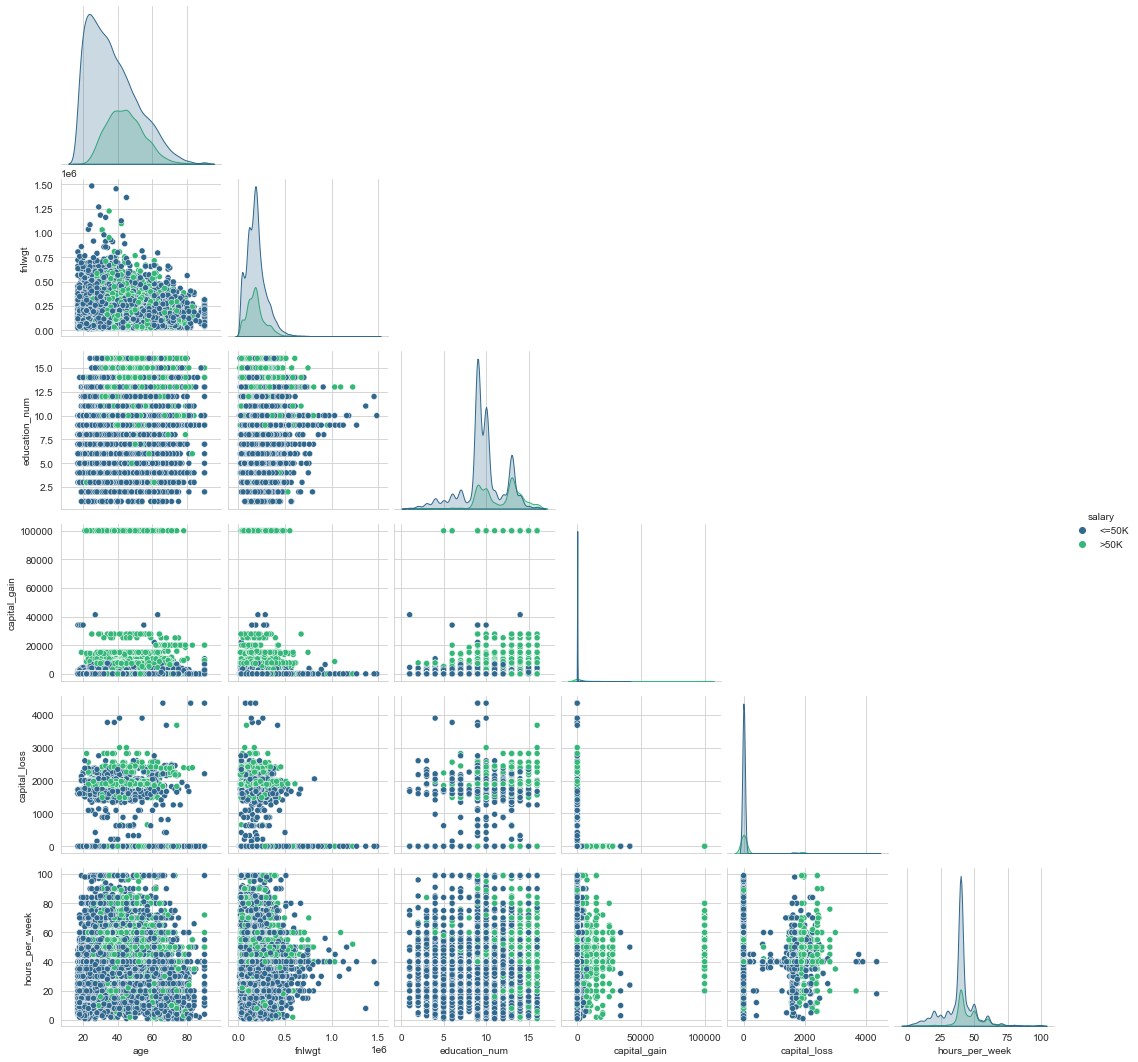

In [65]:
sns.pairplot(df, hue="salary", palette="viridis", corner=True);



# Categorical Features
**education & education_num**

In [66]:
df.education.value_counts(dropna=False)

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [67]:
df.education_num.value_counts(dropna=False)

9.000     10208
10.000     7089
13.000     5245
14.000     1686
11.000     1343
7.000      1146
12.000     1044
6.000       916
NaN         802
4.000       630
15.000      559
5.000       503
8.000       424
16.000      405
3.000       329
2.000       159
1.000        49
Name: education_num, dtype: int64

In [68]:
df.groupby('education').education_num.value_counts(dropna=False)

#herbir education kategorisi için bir numara verilmiş bu sayede edu_num ve edu kategorilerini inceleyebiiriz

education     education_num
10th          6.000              916
              NaN                 17
11th          7.000             1146
              NaN                 29
12th          8.000              424
              NaN                  9
1st-4th       2.000              159
              NaN                  7
5th-6th       3.000              329
              NaN                  3
7th-8th       4.000              630
              NaN                 15
9th           5.000              503
              NaN                 11
Assoc-acdm    12.000            1044
              NaN                 23
Assoc-voc     11.000            1343
              NaN                 39
Bachelors     13.000            5245
              NaN                108
Doctorate     16.000             405
              NaN                  8
HS-grad       9.000            10208
              NaN                286
Masters       14.000            1686
              NaN                 36
Preschool 

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

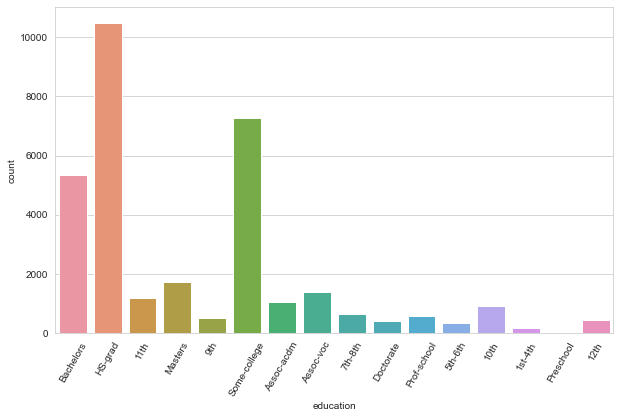

In [69]:
ax = sns.countplot(data=df, x="education")

plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container);
    
#

In [ ]:
ax = sns.countplot(data = df, x = "education_num")

for container in ax.containers:
    ax.bar_label(container);

In [ ]:
df.groupby("education").salary.value_counts()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

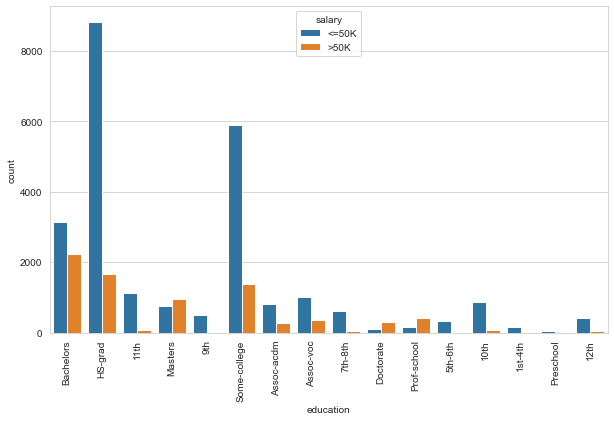

In [71]:
ax = sns.countplot(data = df, x = "education", hue = "salary")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);
    
    
    #eğitim seviyesi yüksek olanların daha yüksek eğitim grubunda olduğunu görüntüleyebiliroz

In [72]:
df.groupby("education_num").salary.value_counts()

education_num  salary
1.000          <=50K       49
2.000          <=50K      153
               >50K         6
3.000          <=50K      313
               >50K        16
4.000          <=50K      592
               >50K        38
5.000          <=50K      477
               >50K        26
6.000          <=50K      854
               >50K        62
7.000          <=50K     1088
               >50K        58
8.000          <=50K      391
               >50K        33
9.000          <=50K     8579
               >50K      1629
10.000         <=50K     5746
               >50K      1343
11.000         <=50K      994
               >50K       349
12.000         <=50K      787
               >50K       257
13.000         <=50K     3078
               >50K      2167
14.000         >50K       935
               <=50K      751
15.000         >50K       410
               <=50K      149
16.000         >50K       302
               <=50K      103
Name: salary, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

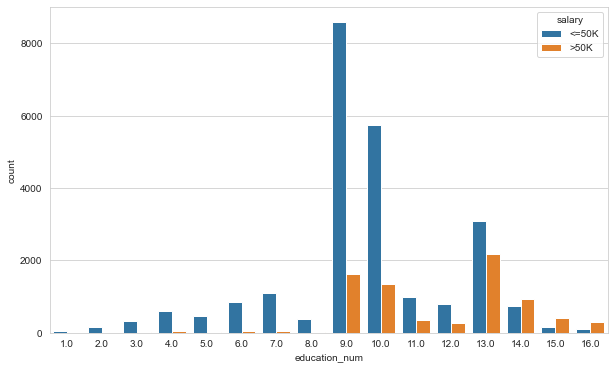

In [73]:
ax = sns.countplot(data = df, x = "education_num", hue = "salary")

for container in ax.containers:
    ax.bar_label(container);

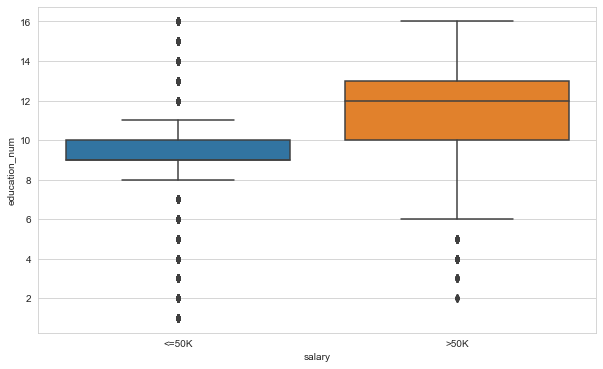

In [74]:
sns.boxplot(data = df, x = "salary", y = "education_num");

 #eğitim seviyesi yüksek olanların daha yüksek eğitim grubunda olduğunu görüntüleyebiliroz


In [75]:
def mapping_education(x):
    if x in ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"]:
        return "low_level_grade"
    elif x in ["HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm"]:
        return "medium_level_grade"
    elif x in ["Bachelors", "Masters", "Prof-school", "Doctorate"]:
        return "high_level_grade"
    
#eğitim seviyelerine göre bazı mapleme işlemi yaptık

In [76]:
df.education.apply(mapping_education).value_counts(dropna=False)

medium_level_grade    20225
high_level_grade       8064
low_level_grade        4248
Name: education, dtype: int64

In [77]:
df["education_summary"] = df.education.apply(mapping_education)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

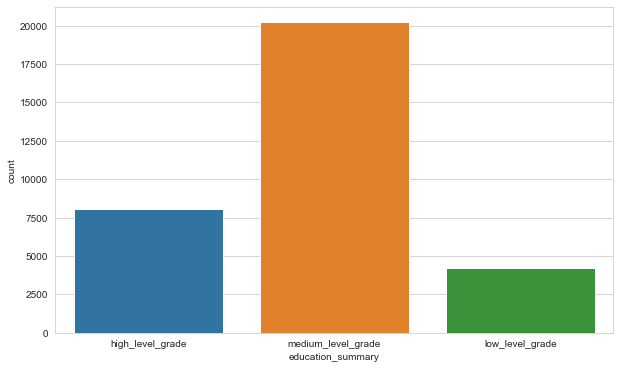

In [78]:
ax = sns.countplot(data = df, x = "education_summary")

for container in ax.containers:
    ax.bar_label(container);

In [79]:
df.groupby("education_summary").salary.value_counts()

#eğitim seviyesine göre aylık kazanç

education_summary   salary
high_level_grade    <=50K      4155
                    >50K       3909
low_level_grade     <=50K      4004
                    >50K        244
medium_level_grade  <=50K     16539
                    >50K       3686
Name: salary, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

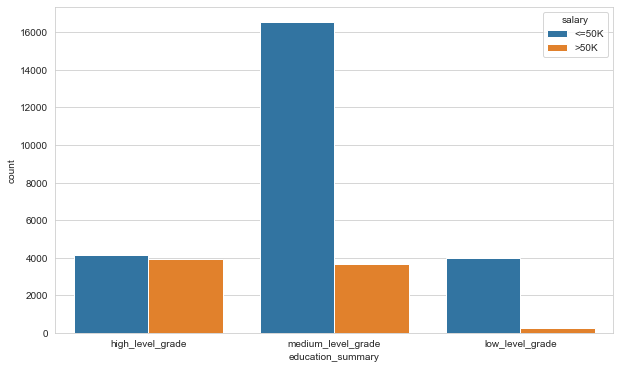

In [80]:
ax = sns.countplot(data=df, x="education_summary", hue="salary")

for container in ax.containers:
    ax.bar_label(container);
    
    
#oransal olarak görselleştirmek daha sağlıklı bir analiz olabilir 

In [81]:
edu = df.groupby(["education_summary"]).salary.value_counts(normalize=True)
edu

education_summary   salary
high_level_grade    <=50K    0.515
                    >50K     0.485
low_level_grade     <=50K    0.943
                    >50K     0.057
medium_level_grade  <=50K    0.818
                    >50K     0.182
Name: salary, dtype: float64

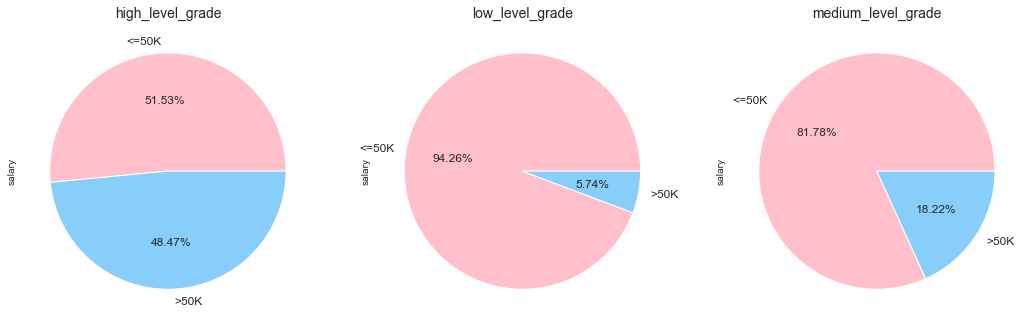

In [82]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2, 4]:
    plt.subplot(1,3,index)
    edu[i:i+2].plot.pie(subplots=True,
                        labels=["<=50K", ">50K"],
                        autopct="%.2f%%",
                        textprops={'fontsize': 12},
                        colors=['pink', 'lightskyblue'],
                        )
    plt.title(edu.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [83]:
df.groupby("salary").education_summary.value_counts()

salary  education_summary 
<=50K   medium_level_grade    16539
        high_level_grade       4155
        low_level_grade        4004
>50K    high_level_grade       3909
        medium_level_grade     3686
        low_level_grade         244
Name: education_summary, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

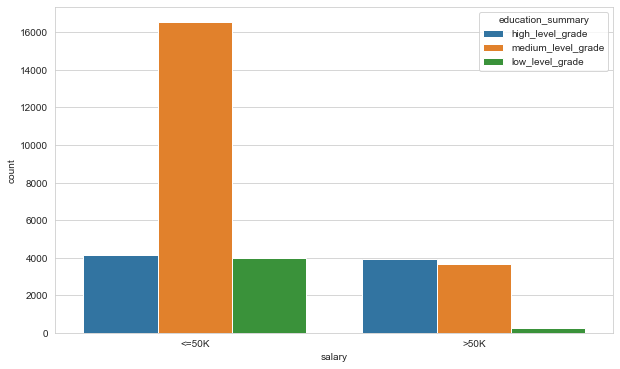

In [84]:
ax = sns.countplot(data=df, x="salary", hue="education_summary")

for container in ax.containers:
    ax.bar_label(container);

In [85]:
edu = df.groupby(["salary"]).education_summary.value_counts(normalize=True)
edu

salary  education_summary 
<=50K   medium_level_grade   0.670
        high_level_grade     0.168
        low_level_grade      0.162
>50K    high_level_grade     0.499
        medium_level_grade   0.470
        low_level_grade      0.031
Name: education_summary, dtype: float64

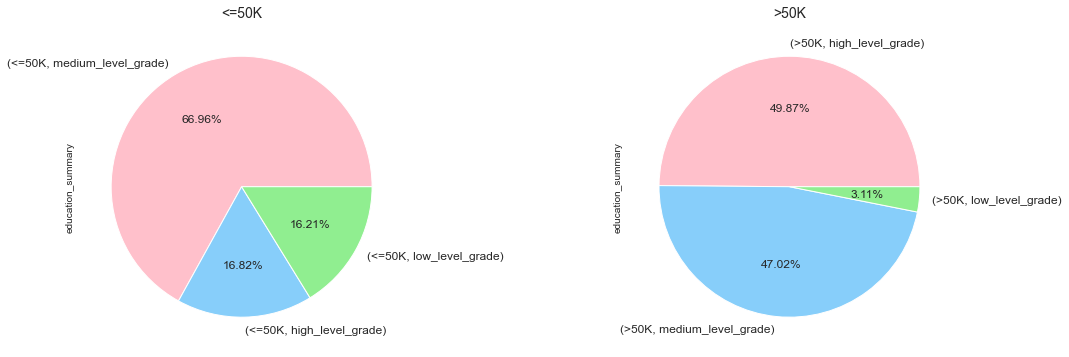

In [86]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 3]:
    plt.subplot(1,2,index)
    edu[i:i+3].plot.pie(subplots=True,
                       #labels=["high", "medium", "low"],
                        autopct="%.2f%%",
                        textprops={'fontsize': 12},
                        colors=['pink', 'lightskyblue', 'lightgreen'],
                        )
    plt.title(edu.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

Yukaridaki görüntüyi daha anlaması kolay bir hale getirmek için farklı bir yol izliyoruz


In [87]:
pd.DataFrame(edu)

#yeni bir dataframe e atıyoruz 

education_summary
salary education_summary                    
<=50K  medium_level_grade              0.670
       high_level_grade                0.168
       low_level_grade                 0.162
>50K   high_level_grade                0.499
       medium_level_grade              0.470
       low_level_grade                 0.031

In [88]:
edu_df = pd.DataFrame(edu)
edu_df.rename(columns = {"education_summary" : "percentage"}, inplace = True)
edu_df.reset_index(inplace = True)
edu_df.sort_values(by = ["salary", "education_summary"], inplace=True)
edu_df

#edu_df artık salary , edu_summary ve percentage gibi bir sıralamayla anlaşılır hale geldi

,salary,education_summary,percentage
1,<=50K,high_level_grade,0.168
2,<=50K,low_level_grade,0.162
0,<=50K,medium_level_grade,0.670
3,>50K,high_level_grade,0.499
5,>50K,low_level_grade,0.031
4,>50K,medium_level_grade,0.470


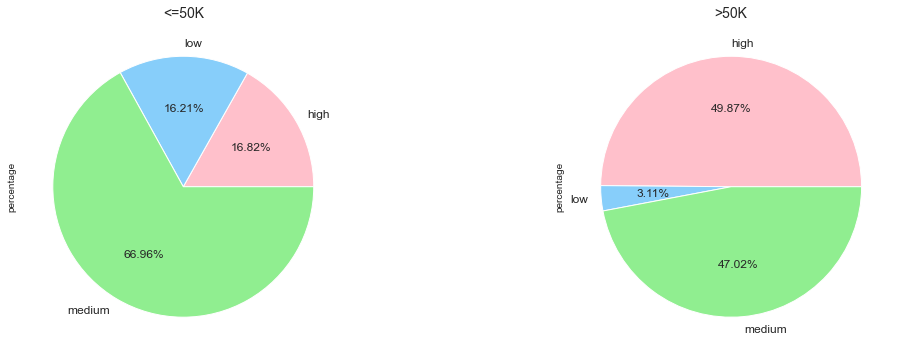

In [89]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 3]:
    plt.subplot(1,2,index)
    edu_df["percentage"][i:i+3].plot.pie(subplots=True,
                                         labels=["high", "low", "medium"],
                                         autopct="%.2f%%",
                                         textprops={'fontsize': 12},
                                         colors=['pink', 'lightskyblue', 'lightgreen'],
                                         )
    plt.title(edu_df.salary[i], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

#yine aynı yöntemle bu sefer labelların daha düzgün ve sade görsel haline getiridk

**Sonuç :** Ne kadar çok eğitim o kadar yüksek gelir demek rahatlıkla söyleyebiliriz.

# marital_status & relationship

In [90]:
df.marital_status.value_counts(dropna=False)

#evlilik durumlarının kendi içerisinde gruplandırılmış hallleri (evli,boşanmış, ayrı yaşama vb.)

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [91]:
df.relationship.value_counts(dropna=False)

Husband           13187
Not-in-family      8292
NaN                5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [92]:
df.relationship.fillna("Unknown", inplace=True)

In [93]:
df.groupby("relationship").marital_status.value_counts(dropna=False)

relationship    marital_status       
Husband         Married-civ-spouse       13178
                Married-AF-spouse            9
Not-in-family   Never-married             4694
                Divorced                  2403
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unknown         Never-married             4481
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

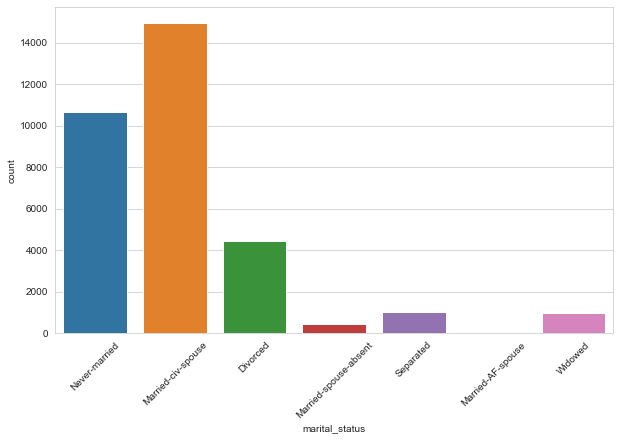

In [94]:
ax = sns.countplot(data=df, x="marital_status")

plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container);

In [95]:
df.groupby("marital_status").salary.value_counts()

marital_status         salary
Divorced               <=50K      3978
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8280
                       >50K       6690
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10176
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
Name: salary, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

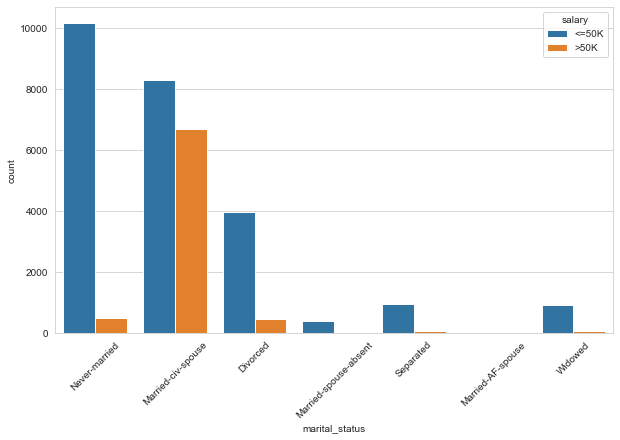

In [96]:
ax = sns.countplot(data=df, x="marital_status", hue="salary")

plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container);

In [97]:
def mapping_marital_status(x):
    if x in ["Never-married", "Divorced", "Separated", "Widowed"]:
        return "unmarried"
    elif x in ["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"]:
        return "married"
    
#data hakkında daha iyi bir fikir edinebilmek için verileri iki farklı gruba ayırdık . Evli veya değil şeklinde

In [98]:
df.marital_status.apply(mapping_marital_status).value_counts(dropna=False)

unmarried    17126
married      15411
Name: marital_status, dtype: int64

In [99]:
df["marital_status_summary"] = df.marital_status.apply(mapping_marital_status)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

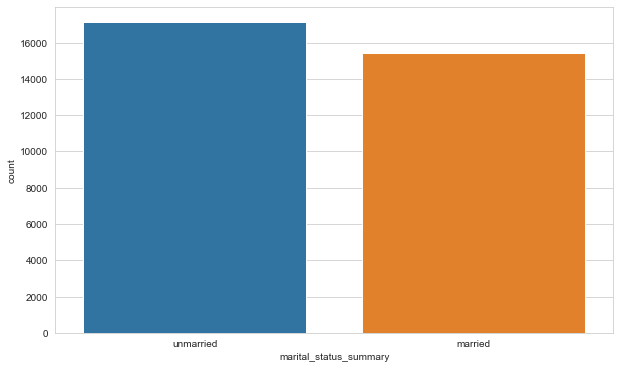

In [100]:
ax = sns.countplot(data=df, x="marital_status_summary")

for container in ax.containers:
    ax.bar_label(container);
    
    #

In [101]:
df.groupby("marital_status_summary").salary.value_counts()

marital_status_summary  salary
married                 <=50K      8677
                        >50K       6734
unmarried               <=50K     16021
                        >50K       1105
Name: salary, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

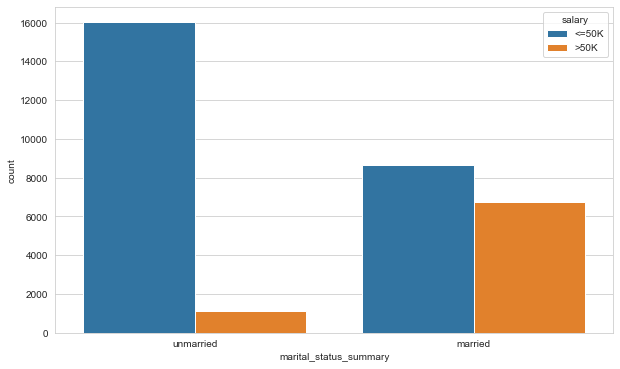

In [102]:
ax = sns.countplot(data=df, x="marital_status_summary", hue="salary")

for container in ax.containers:
    ax.bar_label(container);
    
    
    #evli olanların total gelir seviyelerinin daha yüksek olduğunu görebiliriz

In [103]:
marital = df.groupby(["marital_status_summary"]).salary.value_counts(normalize=True)
marital

marital_status_summary  salary
married                 <=50K    0.563
                        >50K     0.437
unmarried               <=50K    0.935
                        >50K     0.065
Name: salary, dtype: float64

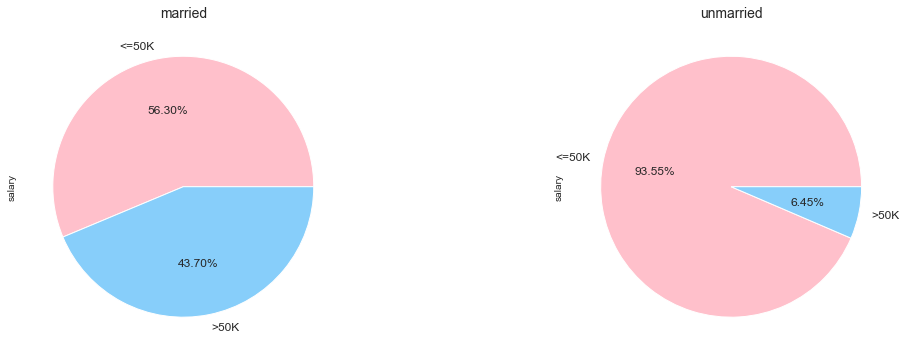

In [104]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    marital[i:i+2].plot.pie(subplots=True,
                            labels=["<=50K", ">50K"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(marital.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [105]:
df.groupby("salary").marital_status_summary.value_counts()

#bu seferde gelir seviyelerine göre gruplandırma yapalım. 

salary  marital_status_summary
<=50K   unmarried                 16021
        married                    8677
>50K    married                    6734
        unmarried                  1105
Name: marital_status_summary, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

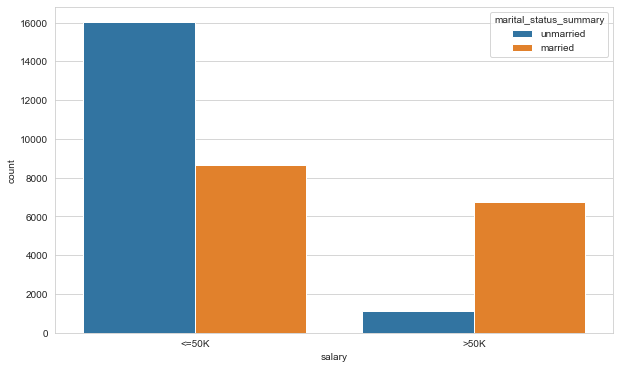

In [106]:

ax = sns.countplot(data=df, x="salary", hue="marital_status_summary")

for container in ax.containers:
    ax.bar_label(container);

In [107]:
marital = df.groupby("salary").marital_status_summary.value_counts(normalize=True)
marital

salary  marital_status_summary
<=50K   unmarried                0.649
        married                  0.351
>50K    married                  0.859
        unmarried                0.141
Name: marital_status_summary, dtype: float64

In [108]:
marital_df = pd.DataFrame(marital)
marital_df.rename(columns = {"marital_status_summary" : "percentage"}, inplace = True)
marital_df.reset_index(inplace = True)
marital_df.sort_values(by = ["salary", "marital_status_summary"], inplace = True)
marital_df

#yeni bir dataframe elde edip burada subplot elde etmeye çalışıp daha sağlılı labellarla daha sağlıklı sonuçlar hedefliyoruz

,salary,marital_status_summary,percentage
1,<=50K,married,0.351
0,<=50K,unmarried,0.649
2,>50K,married,0.859
3,>50K,unmarried,0.141


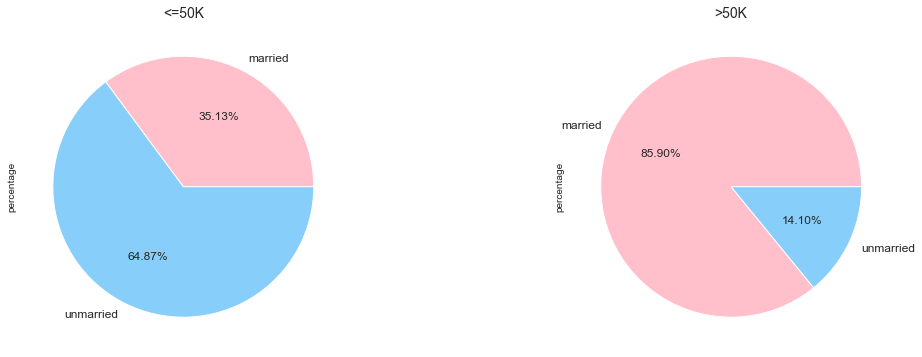

In [109]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    marital_df["percentage"][i:i+2].plot.pie(subplots=True,
                                             labels=["married", "unmarried"],
                                             autopct="%.2f%%",
                                             textprops={'fontsize': 12},
                                             colors=['pink', 'lightskyblue'],
                                             )
    plt.title(marital_df.salary[i], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

**Sonuç :** Evlilerin bekarlara göre daha fazla gelir elde ettiğini rahatlıkla söyleyebiliriz.

# workclass

In [110]:
df.workclass.value_counts(dropna=False)

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

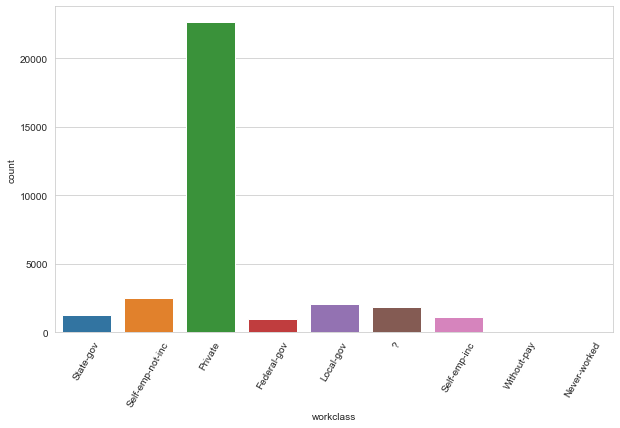

In [111]:
ax = sns.countplot(data=df, x="workclass")

plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container);

In [112]:
df.workclass.replace("?", "Unknown", inplace=True)

In [113]:
df.groupby("workclass").salary.value_counts()

workclass         salary
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      >50K        622
                  <=50K       494
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Unknown           <=50K      1645
                  >50K        191
Without-pay       <=50K        14
Name: salary, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

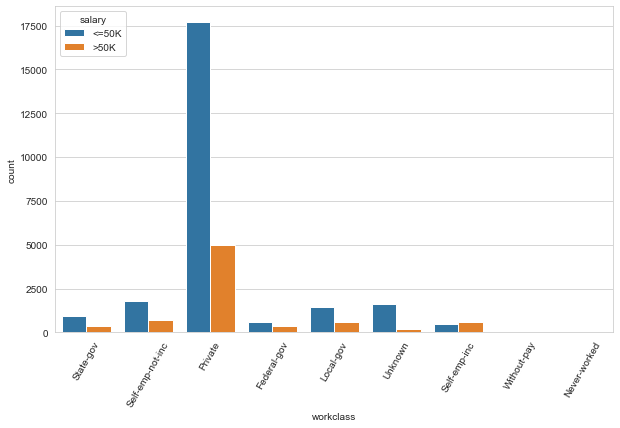

In [114]:
ax = sns.countplot(data = df, x = "workclass", hue = "salary")

plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container);

In [115]:
workclass = df.groupby("workclass").salary.value_counts(normalize=True)
workclass

workclass         salary
Federal-gov       <=50K    0.614
                  >50K     0.386
Local-gov         <=50K    0.705
                  >50K     0.295
Never-worked      <=50K    1.000
Private           <=50K    0.781
                  >50K     0.219
Self-emp-inc      >50K     0.557
                  <=50K    0.443
Self-emp-not-inc  <=50K    0.715
                  >50K     0.285
State-gov         <=50K    0.728
                  >50K     0.272
Unknown           <=50K    0.896
                  >50K     0.104
Without-pay       <=50K    1.000
Name: salary, dtype: float64

In [116]:
workclass_df = pd.DataFrame(workclass)
workclass_df.rename(columns = {"salary" : "percentage"}, inplace = True)
workclass_df.reset_index(inplace = True)
workclass_df.sort_values(by = ["workclass", "salary"], inplace=True)
workclass_df

,workclass,salary,percentage
0,Federal-gov,<=50K,0.614
1,Federal-gov,>50K,0.386
2,Local-gov,<=50K,0.705
3,Local-gov,>50K,0.295
4,Never-worked,<=50K,1.000
5,Private,<=50K,0.781
6,Private,>50K,0.219
8,Self-emp-inc,<=50K,0.443
7,Self-emp-inc,>50K,0.557
9,Self-emp-not-inc,<=50K,0.715


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

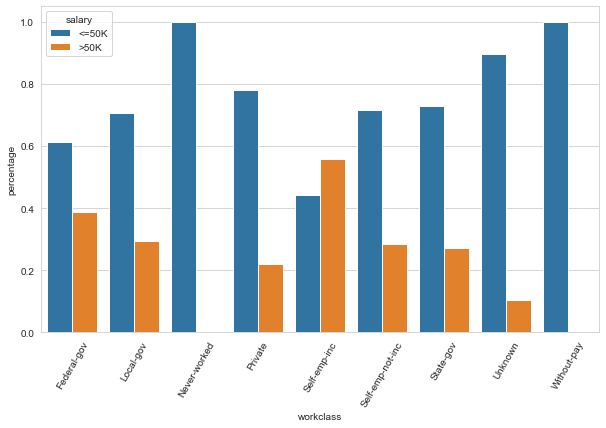

In [117]:
fig, ax = plt.subplots()

ax = sns.barplot(data = workclass_df, x = "workclass", y = "percentage", hue = "salary")

plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt ='%0.2f');

In [118]:
df.groupby("salary").workclass.value_counts()

salary  workclass       
<=50K   Private             17712
        Self-emp-not-inc     1816
        Unknown              1645
        Local-gov            1476
        State-gov             945
        Federal-gov           589
        Self-emp-inc          494
        Without-pay            14
        Never-worked            7
>50K    Private              4961
        Self-emp-not-inc      724
        Self-emp-inc          622
        Local-gov             617
        Federal-gov           371
        State-gov             353
        Unknown               191
Name: workclass, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

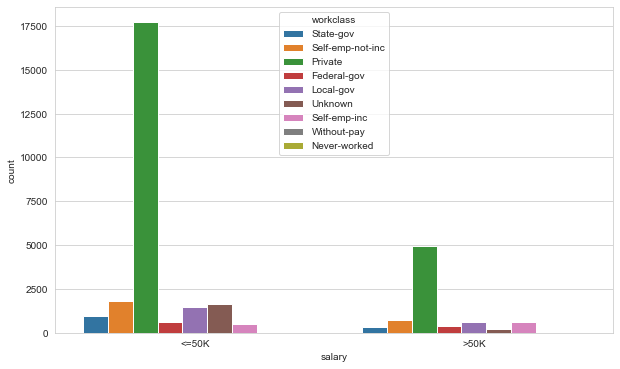

In [119]:
ax = sns.countplot(data=df, x="salary", hue="workclass")

for container in ax.containers:
    ax.bar_label(container);

In [120]:
workclass = df.groupby("salary").workclass.value_counts(normalize=True)
workclass

salary  workclass       
<=50K   Private            0.717
        Self-emp-not-inc   0.074
        Unknown            0.067
        Local-gov          0.060
        State-gov          0.038
        Federal-gov        0.024
        Self-emp-inc       0.020
        Without-pay        0.001
        Never-worked       0.000
>50K    Private            0.633
        Self-emp-not-inc   0.092
        Self-emp-inc       0.079
        Local-gov          0.079
        Federal-gov        0.047
        State-gov          0.045
        Unknown            0.024
Name: workclass, dtype: float64

In [121]:
workclass_df = pd.DataFrame(workclass)
workclass_df.rename(columns = {"workclass" : "percentage"}, inplace = True)
workclass_df.reset_index(inplace = True)
workclass_df.sort_values(by = ["salary", "workclass"], inplace=True)
workclass_df

,salary,workclass,percentage
5,<=50K,Federal-gov,0.024
3,<=50K,Local-gov,0.060
8,<=50K,Never-worked,0.000
0,<=50K,Private,0.717
6,<=50K,Self-emp-inc,0.020
1,<=50K,Self-emp-not-inc,0.074
4,<=50K,State-gov,0.038
2,<=50K,Unknown,0.067
7,<=50K,Without-pay,0.001
13,>50K,Federal-gov,0.047


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

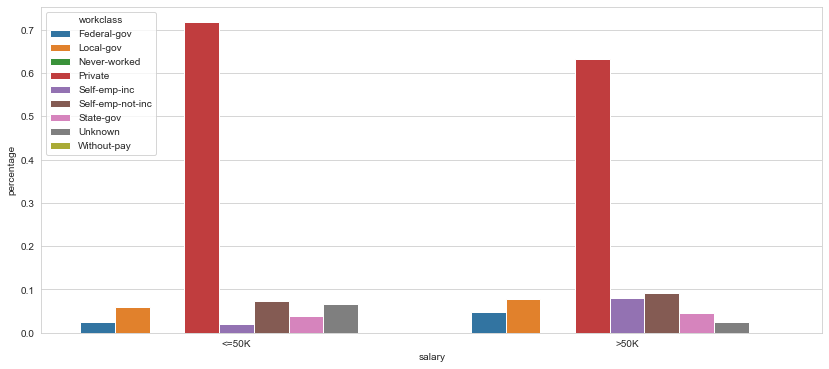

In [122]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=workclass_df, x="salary", y="percentage", hue="workclass")

for container in ax.containers:
    ax.bar_label(container, fmt ='%0.2f');

**Sonuç :** "Self-emp-inc" işçi sınıfı, kendi grubunda üst düzey gelir konusunda yüksek bir orana sahiptir. Üst gelir grubunda “özel” işçi sınıfı, üst düzey gelir konusunda yüksek bir orana sahiptir.

# occupation

In [123]:
df.occupation.value_counts(dropna=False)

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

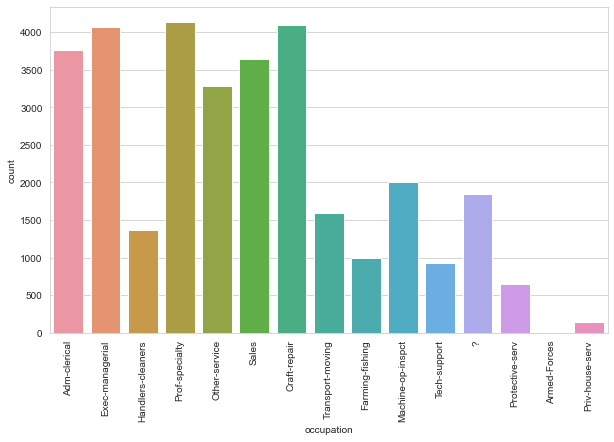

In [124]:
ax = sns.countplot(data=df, x="occupation")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

In [125]:
df.occupation.replace("?", "Unknown", inplace=True)

In [126]:
df.groupby("occupation").salary.value_counts()

occupation         salary
Adm-clerical       <=50K     3261
                   >50K       507
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3165
                   >50K       929
Exec-managerial    <=50K     2097
                   >50K      1968
Farming-fishing    <=50K      877
                   >50K       115
Handlers-cleaners  <=50K     1283
                   >50K        86
Machine-op-inspct  <=50K     1751
                   >50K       249
Other-service      <=50K     3154
                   >50K       137
Priv-house-serv    <=50K      146
                   >50K         1
Prof-specialty     <=50K     2278
                   >50K      1858
Protective-serv    <=50K      438
                   >50K       211
Sales              <=50K     2667
                   >50K       983
Tech-support       <=50K      644
                   >50K       283
Transport-moving   <=50K     1277
                   >50K       320
Unknown            <=5

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

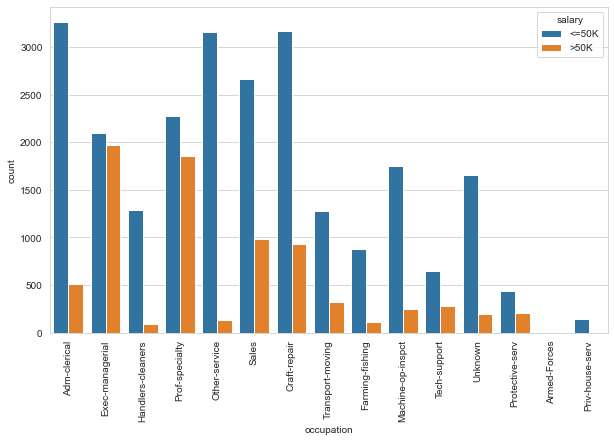

In [127]:
ax = sns.countplot(data = df, x = "occupation", hue = "salary")

plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

In [128]:
occupation = df.groupby("occupation").salary.value_counts(normalize=True)
occupation

occupation         salary
Adm-clerical       <=50K    0.865
                   >50K     0.135
Armed-Forces       <=50K    0.889
                   >50K     0.111
Craft-repair       <=50K    0.773
                   >50K     0.227
Exec-managerial    <=50K    0.516
                   >50K     0.484
Farming-fishing    <=50K    0.884
                   >50K     0.116
Handlers-cleaners  <=50K    0.937
                   >50K     0.063
Machine-op-inspct  <=50K    0.875
                   >50K     0.124
Other-service      <=50K    0.958
                   >50K     0.042
Priv-house-serv    <=50K    0.993
                   >50K     0.007
Prof-specialty     <=50K    0.551
                   >50K     0.449
Protective-serv    <=50K    0.675
                   >50K     0.325
Sales              <=50K    0.731
                   >50K     0.269
Tech-support       <=50K    0.695
                   >50K     0.305
Transport-moving   <=50K    0.800
                   >50K     0.200
Unknown            <=5

In [129]:
occupation_df = pd.DataFrame(occupation)
occupation_df.rename(columns = {"salary" : "percentage"}, inplace = True)
occupation_df.reset_index(inplace = True)
occupation_df.sort_values(by = ["occupation", "salary"], inplace=True)
occupation_df

,occupation,salary,percentage
0,Adm-clerical,<=50K,0.865
1,Adm-clerical,>50K,0.135
2,Armed-Forces,<=50K,0.889
3,Armed-Forces,>50K,0.111
4,Craft-repair,<=50K,0.773
5,Craft-repair,>50K,0.227
6,Exec-managerial,<=50K,0.516
7,Exec-managerial,>50K,0.484
8,Farming-fishing,<=50K,0.884
9,Farming-fishing,>50K,0.116


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

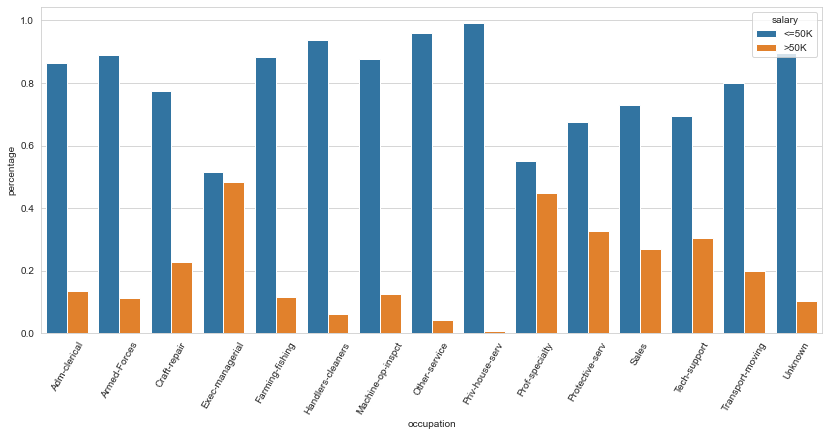

In [130]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data = occupation_df, x = "occupation", y = "percentage", hue = "salary")

plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt ='%0.2f');

In [131]:
df.groupby("salary").occupation.value_counts()

salary  occupation       
<=50K   Adm-clerical         3261
        Craft-repair         3165
        Other-service        3154
        Sales                2667
        Prof-specialty       2278
        Exec-managerial      2097
        Machine-op-inspct    1751
        Unknown              1652
        Handlers-cleaners    1283
        Transport-moving     1277
        Farming-fishing       877
        Tech-support          644
        Protective-serv       438
        Priv-house-serv       146
        Armed-Forces            8
>50K    Exec-managerial      1968
        Prof-specialty       1858
        Sales                 983
        Craft-repair          929
        Adm-clerical          507
        Transport-moving      320
        Tech-support          283
        Machine-op-inspct     249
        Protective-serv       211
        Unknown               191
        Other-service         137
        Farming-fishing       115
        Handlers-cleaners      86
        Armed-Forces  

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

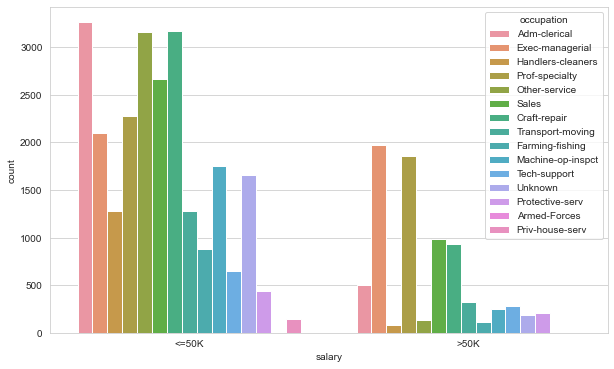

In [132]:
ax = sns.countplot(data=df, x="salary", hue="occupation")

for container in ax.containers:
    ax.bar_label(container);

In [133]:
occupation = df.groupby("salary").occupation.value_counts(normalize=True)
occupation

salary  occupation       
<=50K   Adm-clerical        0.132
        Craft-repair        0.128
        Other-service       0.128
        Sales               0.108
        Prof-specialty      0.092
        Exec-managerial     0.085
        Machine-op-inspct   0.071
        Unknown             0.067
        Handlers-cleaners   0.052
        Transport-moving    0.052
        Farming-fishing     0.036
        Tech-support        0.026
        Protective-serv     0.018
        Priv-house-serv     0.006
        Armed-Forces        0.000
>50K    Exec-managerial     0.251
        Prof-specialty      0.237
        Sales               0.125
        Craft-repair        0.119
        Adm-clerical        0.065
        Transport-moving    0.041
        Tech-support        0.036
        Machine-op-inspct   0.032
        Protective-serv     0.027
        Unknown             0.024
        Other-service       0.017
        Farming-fishing     0.015
        Handlers-cleaners   0.011
        Armed-Forces  

In [134]:
occupation_df = pd.DataFrame(occupation)
occupation_df.rename(columns = {"occupation" : "percentage"}, inplace = True)
occupation_df.reset_index(inplace = True)
occupation_df.sort_values(by = ["salary", "percentage"], inplace=True)
occupation_df

,salary,occupation,percentage
14,<=50K,Armed-Forces,0.000
13,<=50K,Priv-house-serv,0.006
12,<=50K,Protective-serv,0.018
11,<=50K,Tech-support,0.026
10,<=50K,Farming-fishing,0.036
9,<=50K,Transport-moving,0.052
8,<=50K,Handlers-cleaners,0.052
7,<=50K,Unknown,0.067
6,<=50K,Machine-op-inspct,0.071
5,<=50K,Exec-managerial,0.085


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

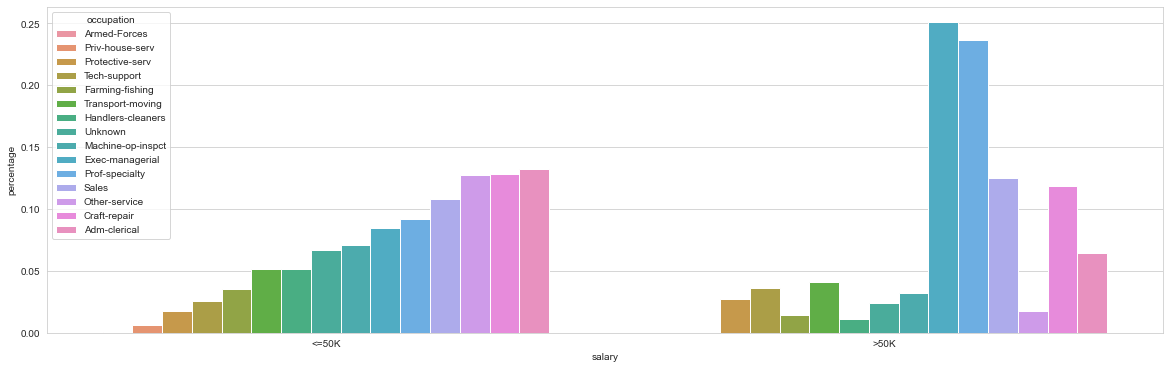

In [135]:
fig, ax = plt.subplots(figsize=(20, 6))

ax = sns.barplot(data = occupation_df, x = "salary", y = "percentage", hue = "occupation")

for container in ax.containers:
    ax.bar_label(container, fmt ='%0.2f');

**Result :** "Exec-managerial" and "Prof-specialty" occupations have a high ratio of high-level income both in the self group and in the high-income group.

In [136]:
df.race.value_counts(dropna=False)

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

NameError: name 'sx' is not defined

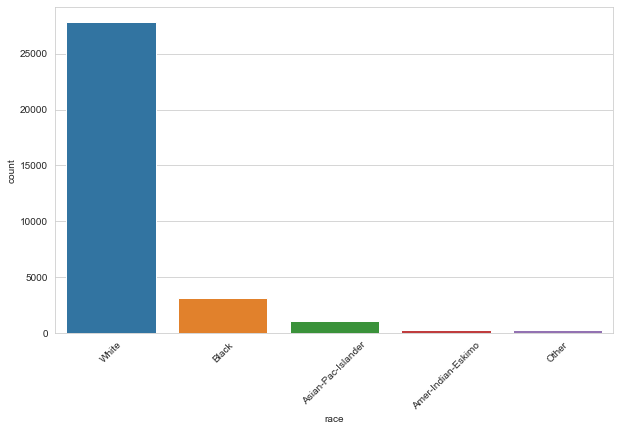

In [137]:
ax = sns.countplot(data=df, x = 'race')
plt.xticks(rotation = 45)

for container in ax.containers:
    sx.bar_label(container);

In [138]:
df.groupby("race").salary.value_counts()

race                salary
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       762
                    >50K        276
Black               <=50K      2735
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20680
                    >50K       7115
Name: salary, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

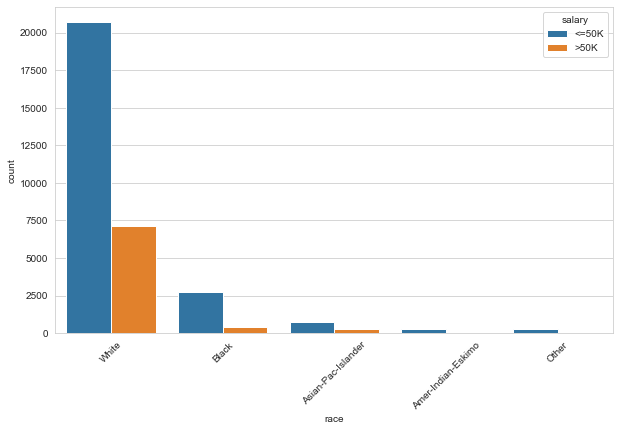

In [139]:
ax = sns.countplot(data=df, x="race", hue="salary")

plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container);

In [140]:
race = df.groupby("race").salary.value_counts(normalize=True)
race

race                salary
Amer-Indian-Eskimo  <=50K    0.884
                    >50K     0.116
Asian-Pac-Islander  <=50K    0.734
                    >50K     0.266
Black               <=50K    0.876
                    >50K     0.124
Other               <=50K    0.908
                    >50K     0.092
White               <=50K    0.744
                    >50K     0.256
Name: salary, dtype: float64

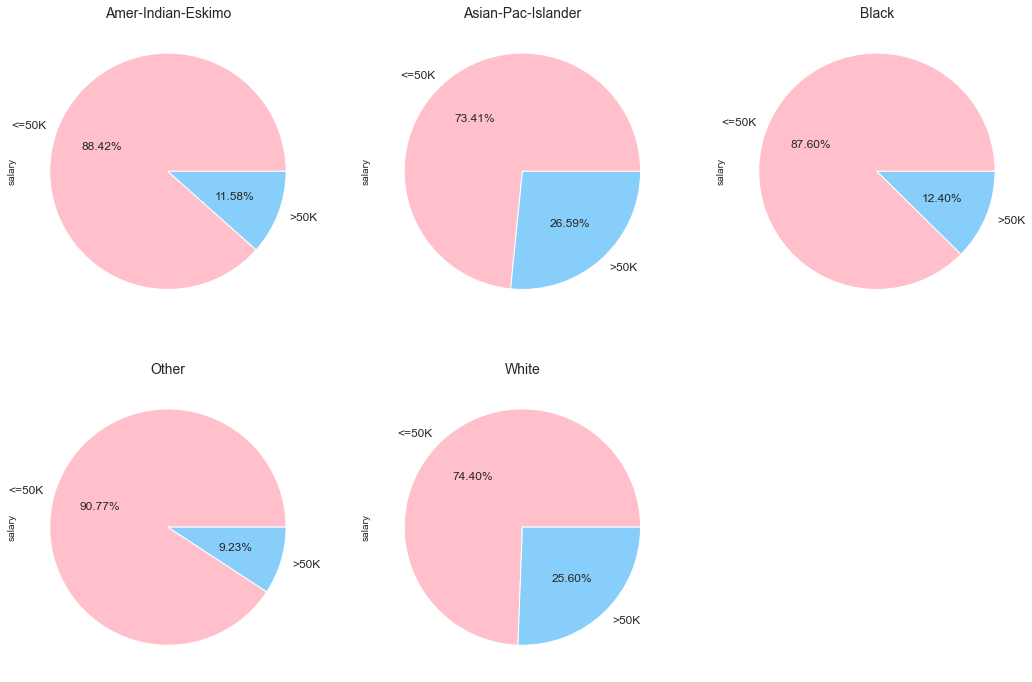

In [141]:
plt.figure(figsize = (18, 12))
index = 1
for i in [0, 2, 4, 6, 8]:
    plt.subplot(2,3,index)
    race[i:i+2].plot.pie(subplots=True,
                         labels=["<=50K", ">50K"],
                         autopct="%.2f%%",
                         textprops={'fontsize': 12},
                         colors=['pink', 'lightskyblue'],
                         )
    plt.title(race.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [142]:
df.groupby("salary").race.value_counts()

salary  race              
<=50K   White                 20680
        Black                  2735
        Asian-Pac-Islander      762
        Amer-Indian-Eskimo      275
        Other                   246
>50K    White                  7115
        Black                   387
        Asian-Pac-Islander      276
        Amer-Indian-Eskimo       36
        Other                    25
Name: race, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

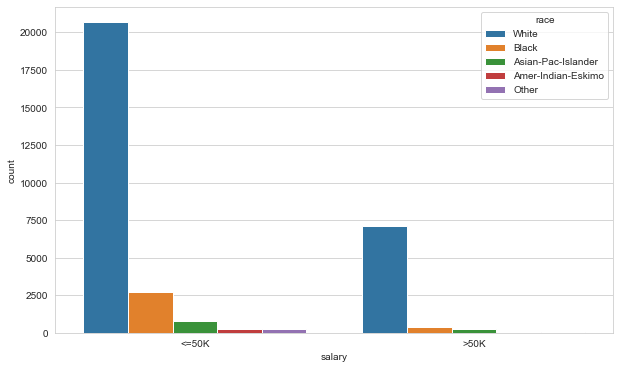

In [143]:
ax = sns.countplot(data=df, x="salary", hue="race")

for container in ax.containers:
    ax.bar_label(container);

In [144]:
race = df.groupby("salary").race.value_counts(normalize=True)
race

salary  race              
<=50K   White                0.837
        Black                0.111
        Asian-Pac-Islander   0.031
        Amer-Indian-Eskimo   0.011
        Other                0.010
>50K    White                0.908
        Black                0.049
        Asian-Pac-Islander   0.035
        Amer-Indian-Eskimo   0.005
        Other                0.003
Name: race, dtype: float64

In [145]:
race_df = pd.DataFrame(race)
race_df.rename(columns = {"race" : "percentage"}, inplace = True)
race_df.reset_index(inplace = True)
race_df.sort_values(by = ["salary", "race"], inplace=True)
race_df

,salary,race,percentage
3,<=50K,Amer-Indian-Eskimo,0.011
2,<=50K,Asian-Pac-Islander,0.031
1,<=50K,Black,0.111
4,<=50K,Other,0.010
0,<=50K,White,0.837
8,>50K,Amer-Indian-Eskimo,0.005
7,>50K,Asian-Pac-Islander,0.035
6,>50K,Black,0.049
9,>50K,Other,0.003
5,>50K,White,0.908


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

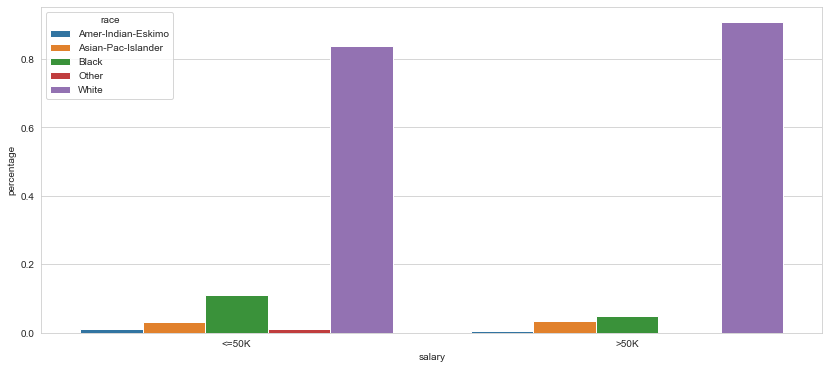

In [146]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=race_df, x="salary", y="percentage", hue="race")

for container in ax.containers:
    ax.bar_label(container, fmt ='%0.2f');

**Result :** "Asian-Pac-Islander" and "White" races has a high ratio in the self group about high-level income. "White" race has a high ratio in the high-income group about high-level income.

In [147]:
df.gender.value_counts(dropna=False)

Male      21775
Female    10762
Name: gender, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

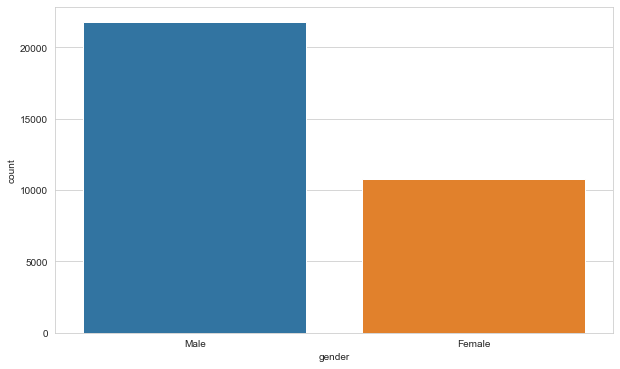

In [148]:

ax = sns.countplot(data=df, x="gender")

for container in ax.containers:
    ax.bar_label(container);

In [149]:

df.groupby("gender").salary.value_counts()

gender  salary
Female  <=50K      9583
        >50K       1179
Male    <=50K     15115
        >50K       6660
Name: salary, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

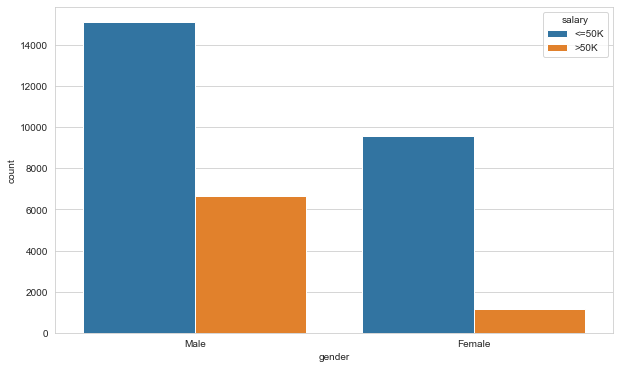

In [150]:
ax = sns.countplot(data=df, x="gender", hue="salary")

for container in ax.containers:
    ax.bar_label(container);

In [151]:
gender = df.groupby("gender").salary.value_counts(normalize=True)
gender

gender  salary
Female  <=50K    0.890
        >50K     0.110
Male    <=50K    0.694
        >50K     0.306
Name: salary, dtype: float64

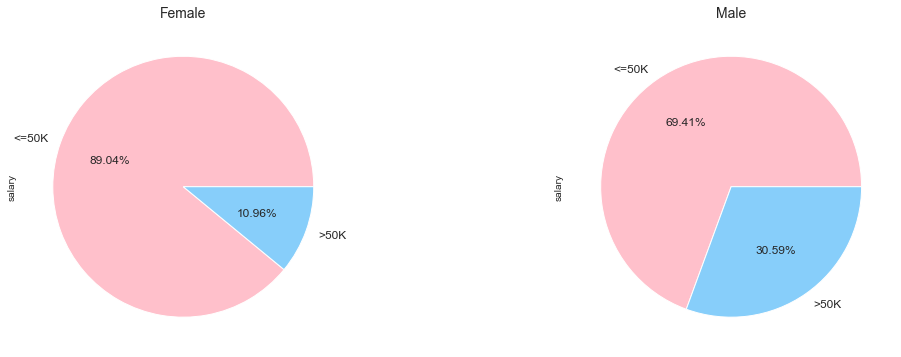

In [152]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    gender[i:i+2].plot.pie(subplots=True,
                         labels=["<=50K", ">50K"],
                         autopct="%.2f%%",
                         textprops={'fontsize': 12},
                         colors=['pink', 'lightskyblue'],
                         )
    plt.title(gender.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [153]:
df.groupby("salary").gender.value_counts()

salary  gender
<=50K   Male      15115
        Female     9583
>50K    Male       6660
        Female     1179
Name: gender, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

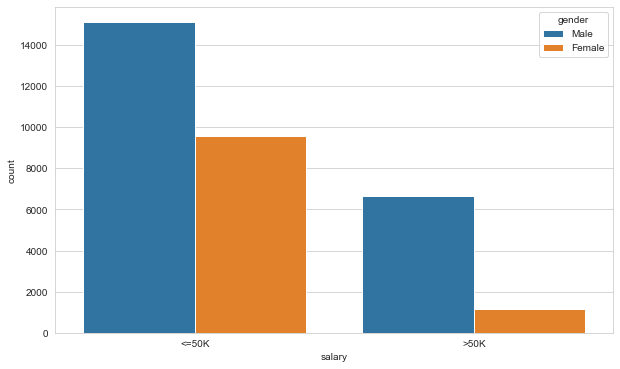

In [154]:
ax = sns.countplot(data=df, x="salary", hue="gender")

for container in ax.containers:
    ax.bar_label(container);

In [155]:
gender = df.groupby("salary").gender.value_counts(normalize=True)
gender

salary  gender
<=50K   Male     0.612
        Female   0.388
>50K    Male     0.850
        Female   0.150
Name: gender, dtype: float64

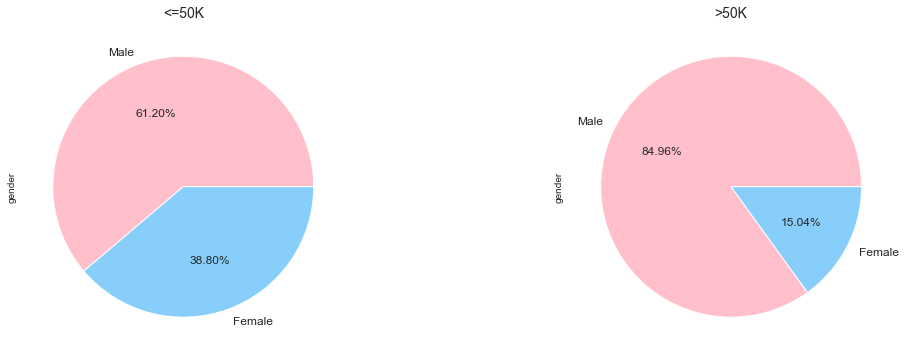

In [156]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    gender[i:i+2].plot.pie(subplots=True,
                         labels=["Male", "Female"],
                         autopct="%.2f%%",
                         textprops={'fontsize': 12},
                         colors=['pink', 'lightskyblue'],
                         )
    plt.title(gender.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

**Result :** We can easily say that males have earned more income than females.

In [157]:

df.native_country.value_counts(dropna=False)

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

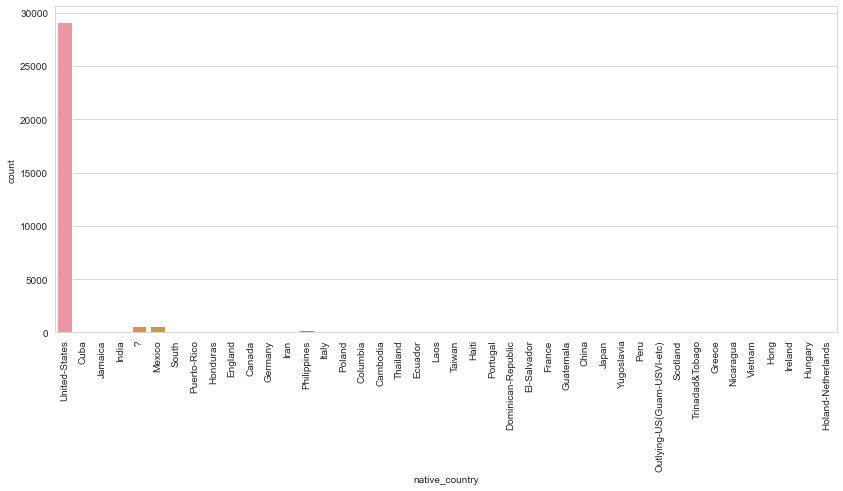

In [158]:
plt.figure(figsize=(14, 6))

sns.countplot(data=df, x="native_country")
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

In [159]:
df.native_country.replace("?", "Unknown", inplace = True)

In [160]:
def mapping_native_country(x):
    if x == "United-States":
        return "US"
    else:
        return "Others"

In [161]:
df.native_country.apply(mapping_native_country).value_counts(dropna=False)

US        29153
Others     3384
Name: native_country, dtype: int64

In [162]:

df["native_country_summary"] = df.native_country.apply(mapping_native_country)
df["native_country_summary"]

0            US
1            US
2            US
3            US
4        Others
          ...  
32556        US
32557        US
32558        US
32559        US
32560        US
Name: native_country_summary, Length: 32537, dtype: object

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

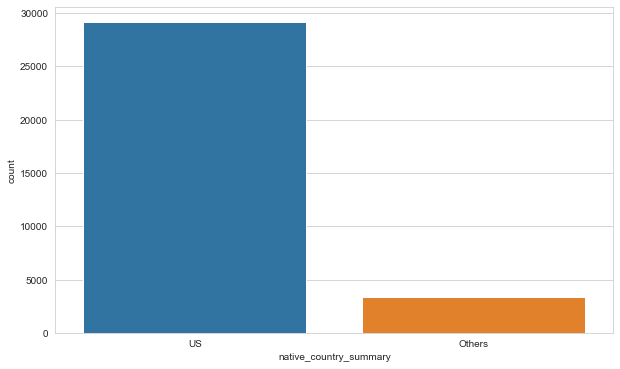

In [163]:
ax = sns.countplot(data=df, x="native_country_summary")

for container in ax.containers:
    ax.bar_label(container);

In [164]:

df.groupby("native_country_summary").salary.value_counts()

native_country_summary  salary
Others                  <=50K      2714
                        >50K        670
US                      <=50K     21984
                        >50K       7169
Name: salary, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

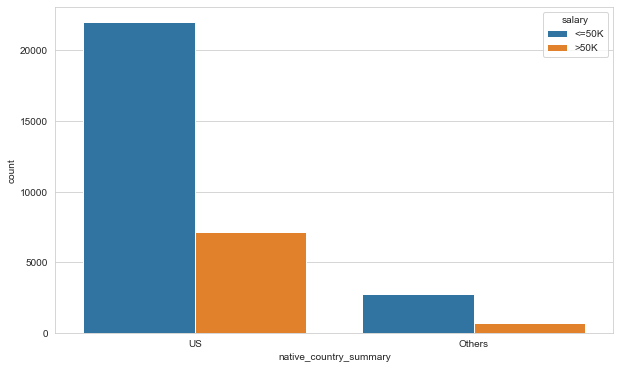

In [165]:
ax = sns.countplot(data=df, x="native_country_summary", hue="salary")

for container in ax.containers:
    ax.bar_label(container);

In [166]:
country = df.groupby(["native_country_summary"]).salary.value_counts(normalize=True)
country

native_country_summary  salary
Others                  <=50K    0.802
                        >50K     0.198
US                      <=50K    0.754
                        >50K     0.246
Name: salary, dtype: float64

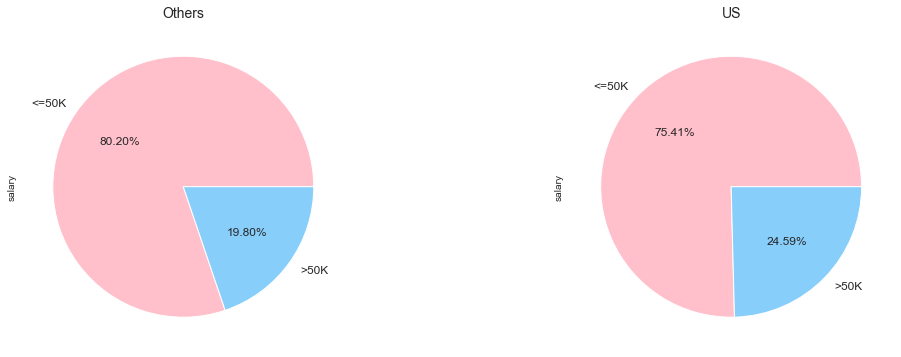

In [167]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    country[i:i+2].plot.pie(subplots=True,
                            labels=["<=50K", ">50K"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(country.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [168]:
df.groupby("salary").native_country_summary.value_counts()

salary  native_country_summary
<=50K   US                        21984
        Others                     2714
>50K    US                         7169
        Others                      670
Name: native_country_summary, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

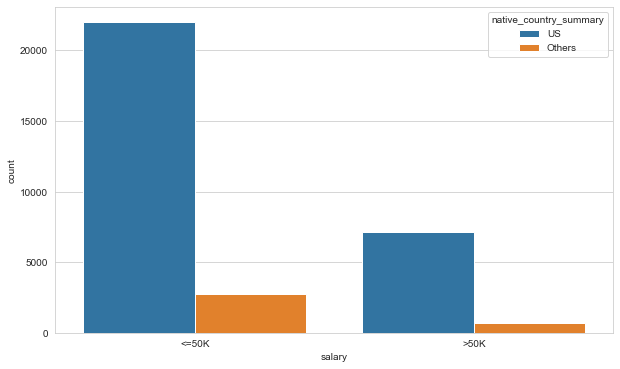

In [169]:
ax = sns.countplot(data=df, x="salary", hue="native_country_summary")

for container in ax.containers:
    ax.bar_label(container);

In [170]:
country = df.groupby(["salary"]).native_country_summary.value_counts(normalize=True)
country

salary  native_country_summary
<=50K   US                       0.890
        Others                   0.110
>50K    US                       0.915
        Others                   0.085
Name: native_country_summary, dtype: float64

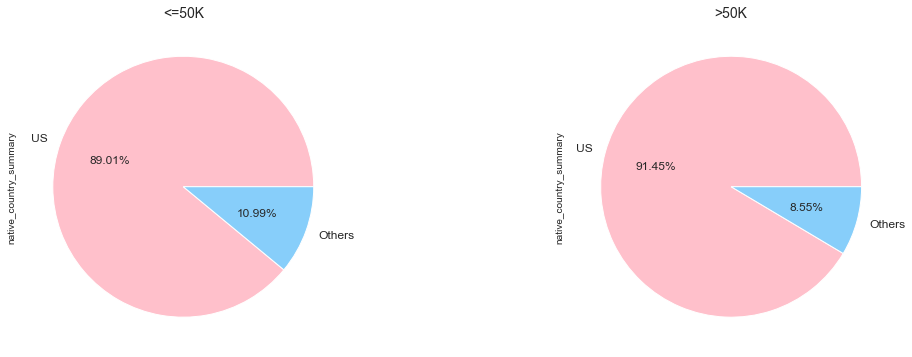

In [171]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    country[i:i+2].plot.pie(subplots=True,
                            labels=["US", "Others"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(country.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

**Result :** "United States" has a high ratio of high-level income both in the self group and in the high-income group.

**Let's find the average age of men and women by income level**

In [172]:
df.groupby(["salary", "gender"]).age.mean()

salary  gender
<=50K   Female   36.217
        Male     37.149
>50K    Female   42.126
        Male     44.627
Name: age, dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

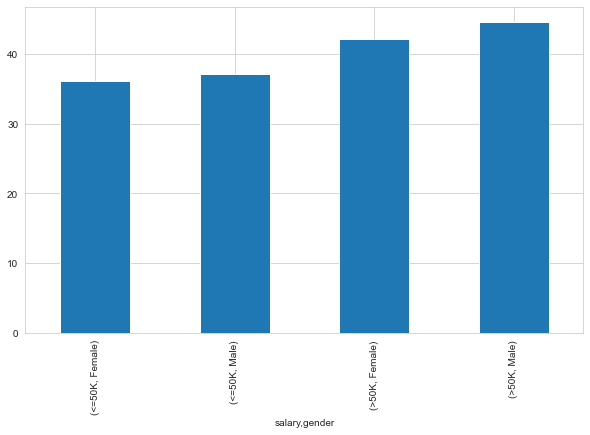

In [173]:
fig, ax = plt.subplots()

ax = df.groupby(["salary", "gender"]).age.mean().plot.bar()

for container in ax.containers:
    ax.bar_label(container);

In [174]:
age = df.groupby(["salary", "gender"])[["age"]].mean().reset_index()
age

,salary,gender,age
0,<=50K,Female,36.217
1,<=50K,Male,37.149
2,>50K,Female,42.126
3,>50K,Male,44.627


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

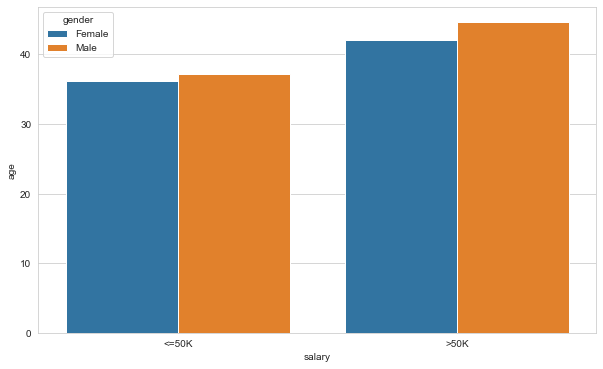

In [175]:
fig, ax = plt.subplots()

ax = sns.barplot(data=age, x="salary", y="age", hue="gender")

for container in ax.containers:
    ax.bar_label(container);

**Let's find the working class percentages of high-income Americans**

In [176]:
workclass_US = df[(df.salary == ">50K") & (df.native_country_summary == "US")].workclass.value_counts(dropna = False, normalize = True) * 100
workclass_US

Private            63.314
Self-emp-not-inc    9.192
Local-gov           8.021
Self-emp-inc        7.784
Federal-gov         4.687
State-gov           4.547
Unknown             2.455
Name: workclass, dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

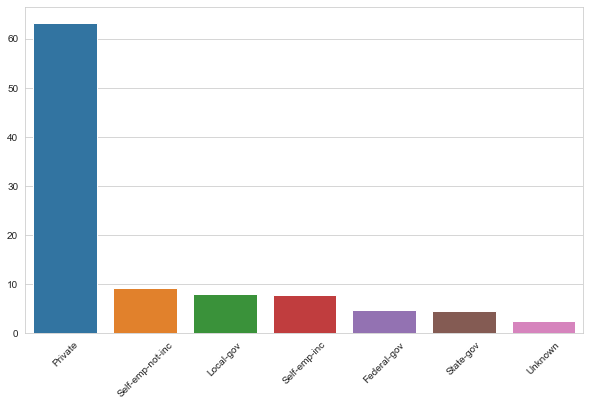

In [177]:
fig, ax = plt.subplots()

ax = sns.barplot(x = workclass_US.index, y = workclass_US.values)
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt ='%0.2f');

**Let's find the occupational percentages of Americans working as the "Private" working class in the upper income group**

In [178]:
occupation_US = df[(df.salary == ">50K") & (df.native_country_summary == "US") & (df.workclass == "Private")]\
                  .occupation.value_counts(dropna = False, normalize = True) * 100 
occupation_US

Exec-managerial     26.438
Prof-specialty      19.476
Craft-repair        14.695
Sales               14.475
Adm-clerical         6.389
Transport-moving     5.442
Tech-support         4.428
Machine-op-inspct    4.428
Other-service        1.674
Handlers-cleaners    1.344
Farming-fishing      0.595
Protective-serv      0.595
Priv-house-serv      0.022
Name: occupation, dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

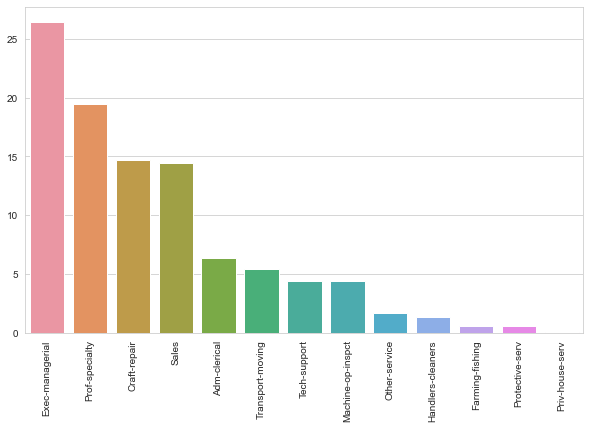

In [179]:
fig, ax = plt.subplots()

ax = sns.barplot(x = occupation_US.index, y = occupation_US.values)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container, fmt ='%0.2f');

**Let's find the percentages of education level in the upper income group of the Asia-Pacific-Island racial group**

In [180]:
Asian_Pac_Islander = df[(df.salary == ">50K") & (df.race == "Asian-Pac-Islander")]\
                     .education.value_counts(dropna = False, normalize = True) * 100 
Asian_Pac_Islander

Bachelors      35.145
Masters        15.580
HS-grad        12.319
Some-college   11.957
Prof-school     9.783
Doctorate       6.522
Assoc-voc       3.261
Assoc-acdm      2.899
5th-6th         1.087
11th            0.362
12th            0.362
9th             0.362
10th            0.362
Name: education, dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

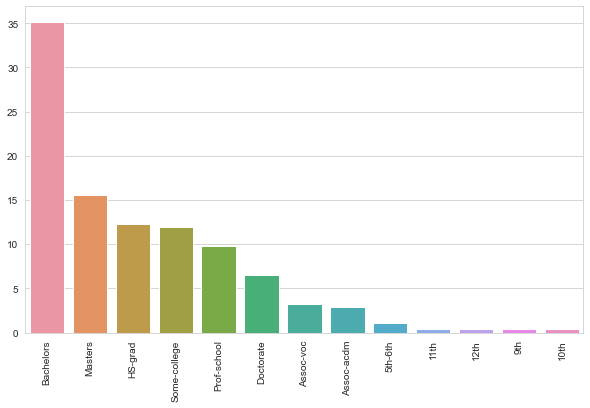

In [181]:
fig, ax = plt.subplots()

ax = sns.barplot(x = Asian_Pac_Islander.index, y = Asian_Pac_Islander.values)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container, fmt ='%0.2f');

**Let's find the percentage of occupations in the upper income group with undergraduate degrees from the Asian-Pacific-Islander race**

In [ ]:
Asian_Pac_Islander = df[(df.salary == ">50K") & (df.race == "Asian-Pac-Islander") & (df.education == "Bachelors")]\
                     .occupation.value_counts(dropna = False, normalize = True) * 100 
Asian_Pac_Islander

In [ ]:
fig, ax = plt.subplots()

ax = sns.barplot(x = Asian_Pac_Islander.index, y = Asian_Pac_Islander.values)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container, fmt ='%0.2f');

**Let's find the average of weekly working hours by gender for education level, working class, marital status summary and hometown summary and try to draw everything necessary in one way**

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

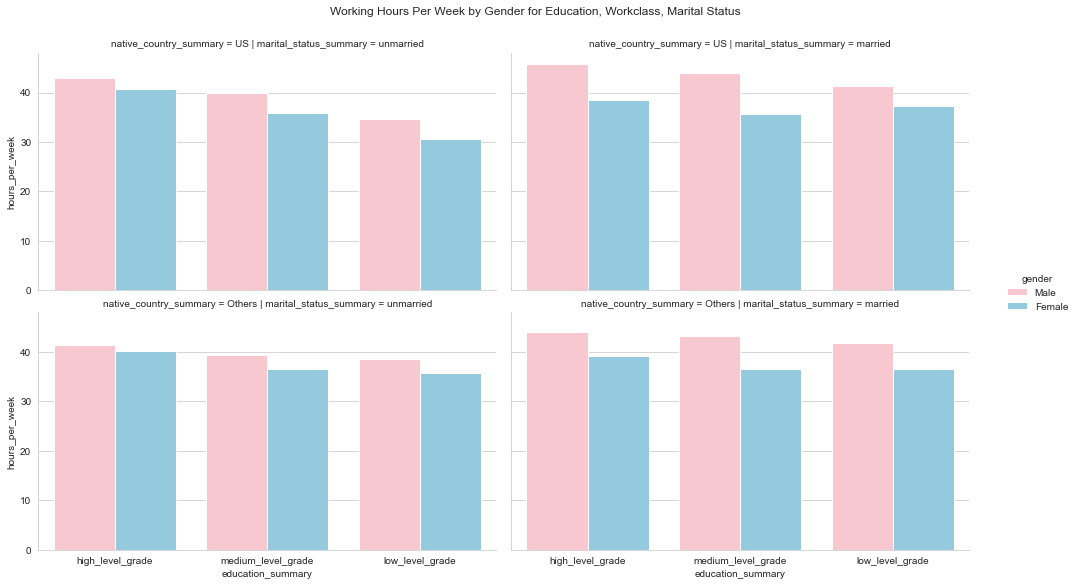

In [182]:
g = sns.catplot(x="education_summary",
                y="hours_per_week",
                data=df,
                kind="bar",
                estimator= np.mean,
                hue="gender",
                col="marital_status_summary",
                row="native_country_summary",
                ci=None,
                palette=sns.color_palette(['pink', 'skyblue']));

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Working Hours Per Week by Gender for Education, Workclass, Marital Status')

# iterate through axes
for ax in g.axes.ravel():

    # add annotations
    for container in ax.containers:
        ax.bar_label(container);
    
    ax.margins(y=0.2)

plt.show()

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32537 non-null  int64  
 1   workclass               32537 non-null  object 
 2   fnlwgt                  32537 non-null  int64  
 3   education               32537 non-null  object 
 4   education_num           31735 non-null  float64
 5   marital_status          32537 non-null  object 
 6   occupation              32537 non-null  object 
 7   relationship            32537 non-null  object 
 8   race                    32537 non-null  object 
 9   gender                  32537 non-null  object 
 10  capital_gain            32537 non-null  int64  
 11  capital_loss            32537 non-null  int64  
 12  hours_per_week          32537 non-null  int64  
 13  native_country          32537 non-null  object 
 14  salary                  32537 non-null

In [185]:
df.drop(columns = ["education", "education_num", "relationship", "marital_status", "native_country"], inplace = True)

In [186]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
gender                    0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

In [187]:
df.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [188]:
df.occupation.value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [189]:
df[df.occupation == "Unknown"].workclass.value_counts()

Unknown         1836
Never-worked       7
Name: workclass, dtype: int64

In [190]:
df.replace("Unknown", np.nan, inplace = True)

In [191]:
df.isnull().sum()

age                          0
workclass                 1836
fnlwgt                       0
occupation                1843
race                         0
gender                       0
capital_gain                 0
capital_loss                 0
hours_per_week               0
salary                       0
education_summary            0
marital_status_summary       0
native_country_summary       0
dtype: int64

In [192]:
df.dropna(inplace = True)

In [193]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
gender                    0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30694 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     30694 non-null  int64 
 1   workclass               30694 non-null  object
 2   fnlwgt                  30694 non-null  int64 
 3   occupation              30694 non-null  object
 4   race                    30694 non-null  object
 5   gender                  30694 non-null  object
 6   capital_gain            30694 non-null  int64 
 7   capital_loss            30694 non-null  int64 
 8   hours_per_week          30694 non-null  int64 
 9   salary                  30694 non-null  object
 10  education_summary       30694 non-null  object
 11  marital_status_summary  30694 non-null  object
 12  native_country_summary  30694 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.3+ MB


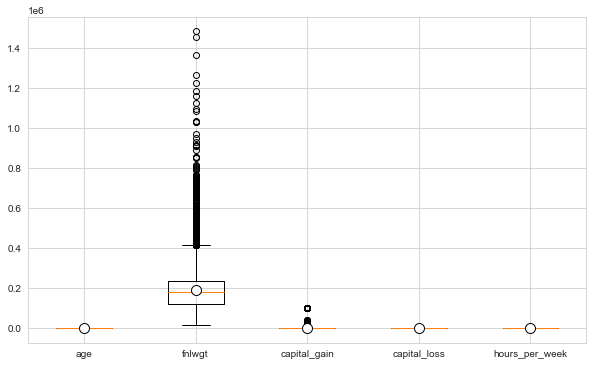

In [195]:
plt.boxplot((df[df.select_dtypes('number').columns]), 
            labels=df.select_dtypes('number').columns,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
plt.show()

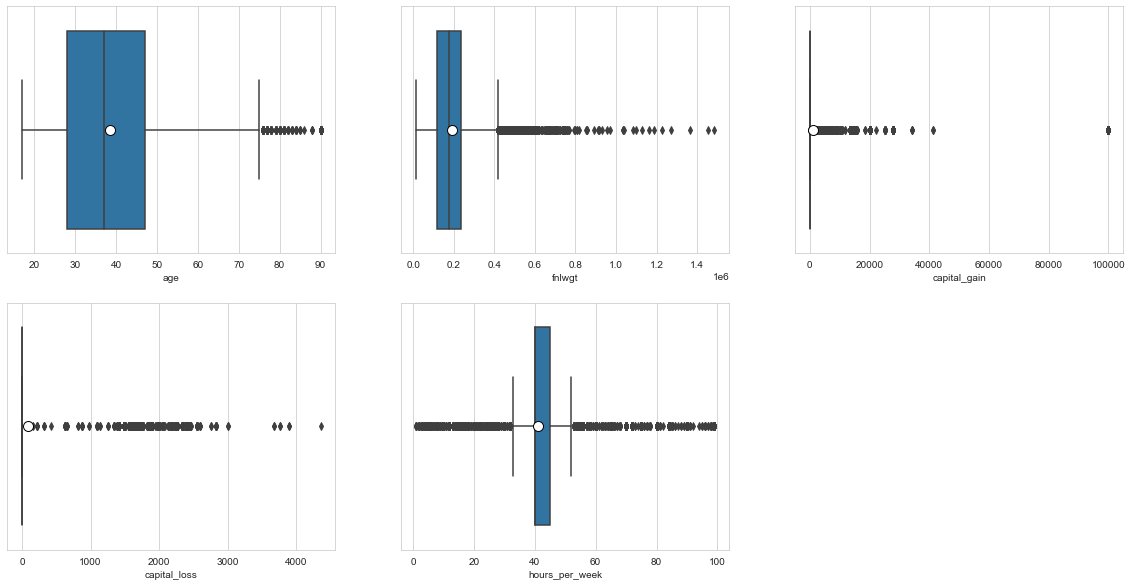

In [196]:
index = 0
plt.figure(figsize=(20, 10))
for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(2,3,index)
    sns.boxplot(x=feature, 
                data=df, 
                whis=1.5,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})

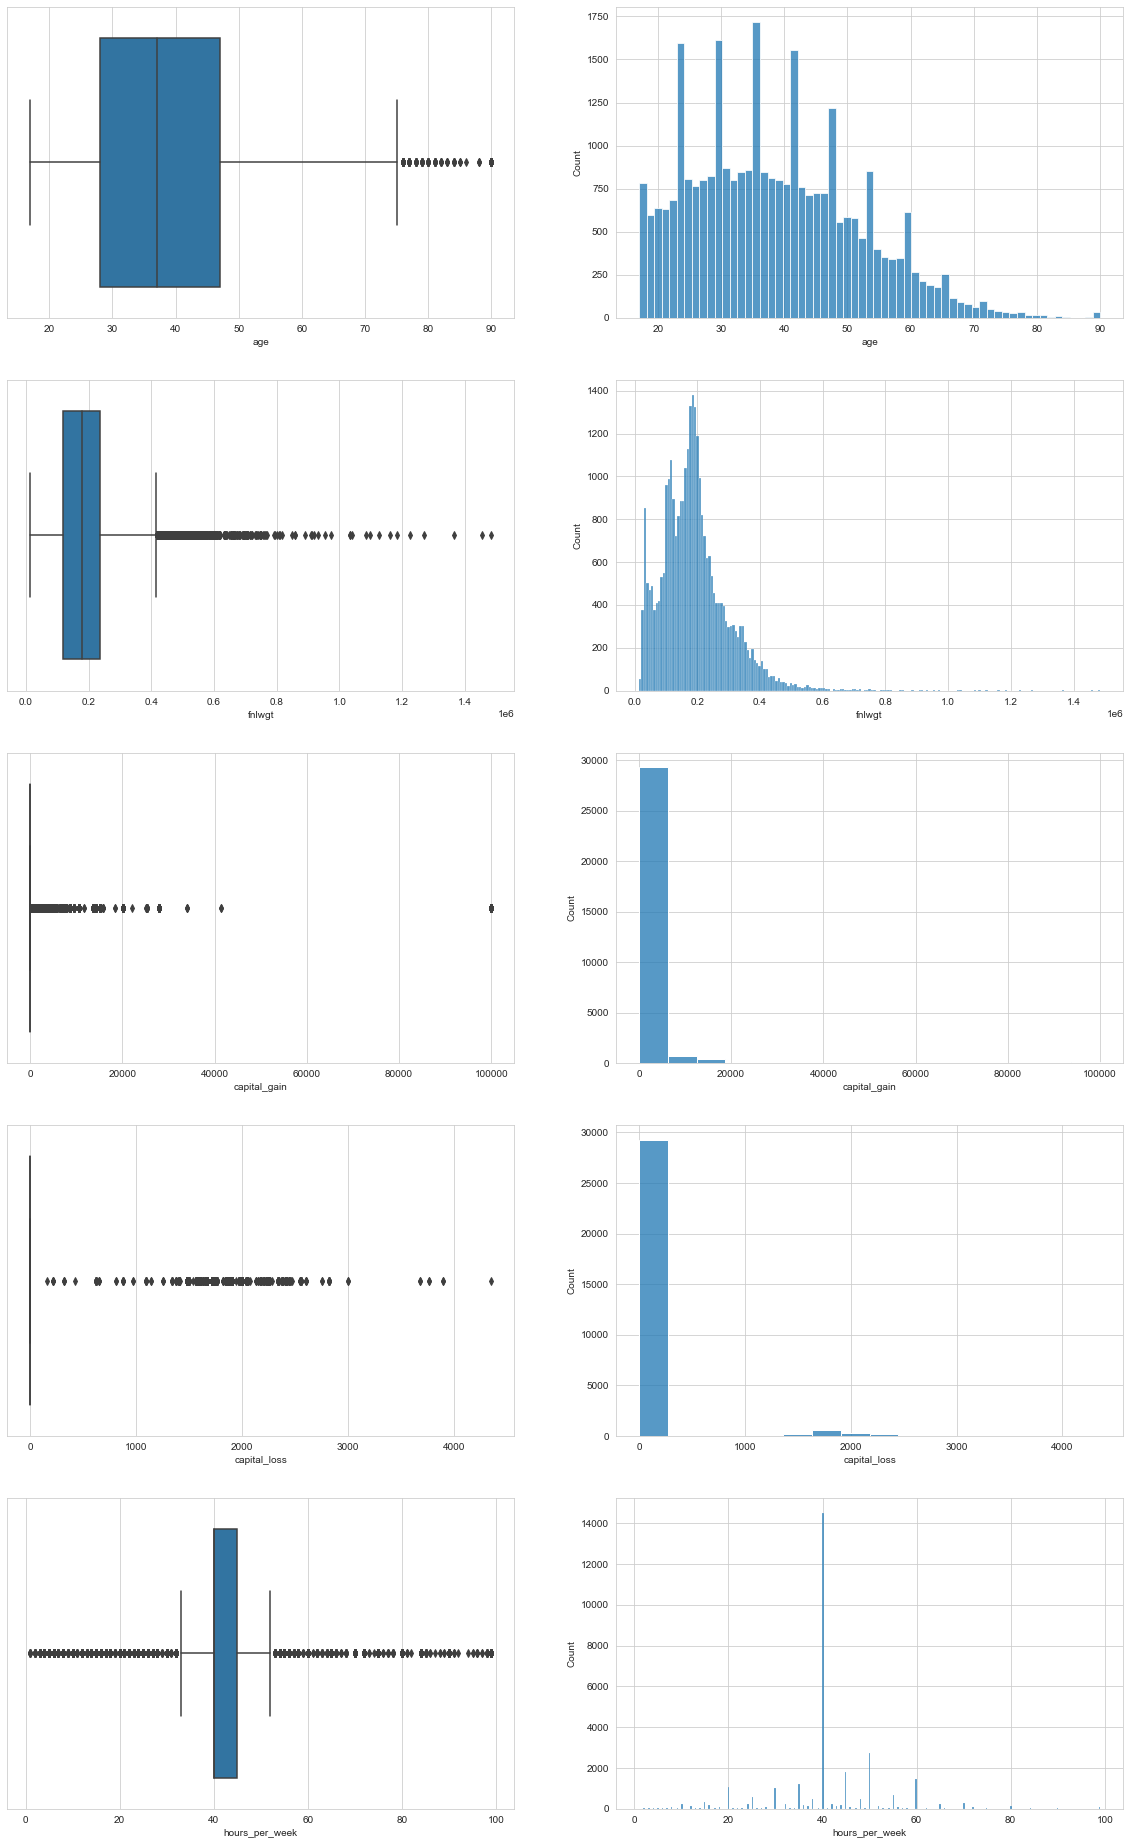

In [197]:
index = 0
plt.figure(figsize=(20, 40))
for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(6,2, index)
    sns.boxplot(x=feature, data=df, whis=1.5)
    index += 1
    plt.subplot(6,2,index)
    sns.histplot(x=feature, data=df)

In [198]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30694.000,38.448,13.115,17.000,28.000,37.000,47.000,90.000
fnlwgt,30694.000,189848.229,105465.126,13769.000,117828.500,178513.500,237293.750,1484705.000
capital_gain,30694.000,1106.902,7500.730,0.000,0.000,0.000,0.000,99999.000
capital_loss,30694.000,88.980,405.808,0.000,0.000,0.000,0.000,4356.000
hours_per_week,30694.000,40.953,11.984,1.000,40.000,40.000,45.000,99.000


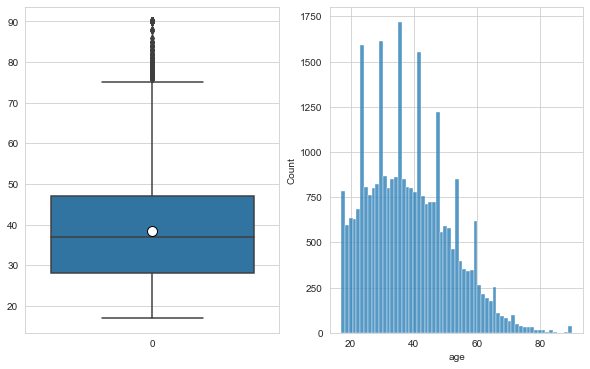

In [199]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df.age,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.subplot(1, 2, 2)
sns.histplot(data=df.age);

In [200]:
low = df.age.quantile(0.25)
high = df.age.quantile(0.75)
IQR = high - low
low, high, IQR

(28.0, 47.0, 19.0)

In [201]:
lower_lim = low - (1.5 * IQR)
upper_lim = high + (1.5 * IQR)
lower_lim, upper_lim

(-0.5, 75.5)

In [202]:
df[df.age > upper_lim].age.value_counts()

90    35
76    30
77    20
80    16
79    15
78    14
81    14
84     8
82     7
83     5
85     3
88     3
86     1
Name: age, dtype: int64

In [203]:
df[df.age > upper_lim].sort_values(by="age", ascending=False)

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
8806,90,Private,87372,Prof-specialty,White,Male,20051,0,72,>50K,high_level_grade,married,US
14159,90,Local-gov,187749,Adm-clerical,Asian-Pac-Islander,Male,0,0,20,<=50K,medium_level_grade,married,Others
28463,90,Federal-gov,195433,Craft-repair,White,Male,0,0,30,<=50K,medium_level_grade,married,US
12975,90,Private,250832,Exec-managerial,White,Male,0,0,40,<=50K,low_level_grade,married,US
11996,90,Private,40388,Exec-managerial,White,Male,0,0,55,<=50K,high_level_grade,unmarried,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15102,76,Local-gov,169133,Adm-clerical,White,Female,0,0,30,<=50K,medium_level_grade,unmarried,US
19085,76,Private,125784,Exec-managerial,White,Male,0,0,40,<=50K,high_level_grade,married,US
23515,76,Private,142535,Adm-clerical,White,Male,0,0,6,<=50K,medium_level_grade,unmarried,US
8240,76,Self-emp-not-inc,225964,Sales,White,Male,0,0,8,<=50K,medium_level_grade,unmarried,US


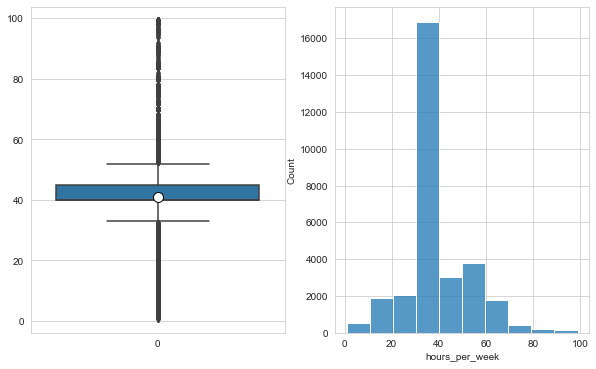

In [204]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df.hours_per_week,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.subplot(1, 2, 2)
sns.histplot(data=df.hours_per_week, bins=10);

In [205]:

low = df.hours_per_week.quantile(0.25)
high = df.hours_per_week.quantile(0.75)
IQR = high - low
low, high, IQR

(40.0, 45.0, 5.0)

In [206]:
lower_lim = low - (1.5 * IQR)
upper_lim = high + (1.5 * IQR)
lower_lim, upper_lim

(32.5, 52.5)

In [207]:
df[df.hours_per_week > upper_lim].hours_per_week.value_counts().sort_index(ascending=False)

99      80
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      28
89       2
88       2
87       1
86       2
85      13
84      41
82       1
81       3
80     124
78       8
77       6
76       3
75      63
74       1
73       2
72      68
70     284
68      12
67       4
66      17
65     242
64      14
63      10
62      18
61       2
60    1441
59       5
58      27
57      17
56      91
55     683
54      39
53      23
Name: hours_per_week, dtype: int64

In [208]:
df[df.hours_per_week > upper_lim].sort_values(by="hours_per_week", ascending=False)

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
25986,44,Local-gov,212665,Protective-serv,Black,Male,0,0,99,<=50K,medium_level_grade,married,US
19529,38,Private,66326,Transport-moving,White,Male,0,0,99,<=50K,medium_level_grade,married,US
8796,39,Private,70995,Transport-moving,White,Male,15024,0,99,>50K,high_level_grade,married,US
15534,29,Private,167716,Other-service,White,Female,0,0,99,<=50K,medium_level_grade,unmarried,US
22313,26,Self-emp-not-inc,258306,Farming-fishing,White,Male,0,0,99,<=50K,low_level_grade,married,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,27,Private,138705,Craft-repair,White,Male,0,0,53,<=50K,medium_level_grade,married,US
23244,58,Private,248739,Farming-fishing,White,Male,0,0,53,>50K,medium_level_grade,married,US
28858,62,Private,123411,Transport-moving,White,Male,0,0,53,<=50K,low_level_grade,married,US
18417,24,Private,117167,Other-service,White,Female,0,0,53,<=50K,medium_level_grade,unmarried,US


In [209]:
df[df.hours_per_week < lower_lim].hours_per_week.value_counts().sort_index()

1        8
2       15
3       24
4       28
5       39
6       40
7       20
8      103
9       17
10     223
11       9
12     143
13      19
14      28
15     350
16     182
17      27
18      64
19      14
20    1066
21      23
22      39
23      20
24     220
25     582
26      30
27      28
28      74
29       6
30    1009
31       5
32     239
Name: hours_per_week, dtype: int64

In [210]:
df[df.hours_per_week < lower_lim].groupby("salary").hours_per_week.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,4372.000,21.548,7.343,1.000,16.000,20.000,30.000,32.000
>50K,322.000,22.028,7.813,1.000,18.000,24.000,30.000,32.000


In [211]:
df[df.hours_per_week < lower_lim].groupby("salary").age.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,4372.000,34.052,17.730,17.000,20.000,26.000,45.000,90.000
>50K,322.000,49.484,13.894,22.000,39.000,48.000,60.000,90.000


**Result :** As we see, there are number of extreme values in both "age and hours_per_week" features. But how can we know if these extreme values are outliers or not? At this point, domain knowledge comes to the fore.

In [212]:
df[(df.age < 17) | (df.age > 80)].sort_values(by = "age", ascending = False)

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
222,90,Private,51744,Other-service,Black,Male,0,2206,40,<=50K,medium_level_grade,unmarried,US
18832,90,Private,115306,Exec-managerial,White,Female,0,0,40,<=50K,high_level_grade,unmarried,US
10545,90,Private,175491,Craft-repair,White,Male,9386,0,50,>50K,medium_level_grade,married,Others
11512,90,Private,87285,Other-service,White,Female,0,0,24,<=50K,medium_level_grade,unmarried,US
11996,90,Private,40388,Exec-managerial,White,Male,0,0,55,<=50K,high_level_grade,unmarried,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19045,81,State-gov,132204,Other-service,White,Female,0,0,20,<=50K,low_level_grade,unmarried,US
6748,81,Private,122651,Sales,White,Male,0,0,15,<=50K,medium_level_grade,married,US
2906,81,Private,114670,Priv-house-serv,Black,Female,2062,0,5,<=50K,low_level_grade,unmarried,US
21501,81,Private,177408,Exec-managerial,White,Male,0,2377,26,>50K,medium_level_grade,married,US


In [213]:
df[(df.age < 17) | (df.age > 80)].shape

(76, 13)

In [214]:
drop_index = df[(df.age < 17) | (df.age > 80)].index
drop_index

Int64Index([  222,   918,  1040,  1168,  1935,  2303,  2891,  2906,  3537,
             4070,  4834,  5272,  5370,  5406,  6214,  6232,  6624,  6748,
             7481,  7720,  8381,  8431,  8806,  8973,  9471, 10210, 10545,
            11238, 11512, 11996, 12830, 12975, 13295, 13696, 13928, 14159,
            14711, 14756, 15356, 15662, 15892, 16302, 18277, 18413, 18725,
            18832, 19045, 19172, 19212, 19489, 19495, 19747, 20421, 20463,
            20610, 21501, 21835, 22220, 22481, 22895, 23459, 24027, 24043,
            24280, 24395, 24560, 26731, 27795, 28463, 28948, 29594, 31030,
            31855, 32277, 32367, 32459],
           dtype='int64')

In [215]:
df.drop(drop_index, inplace = True)

In [216]:
df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].sort_values(by = "hours_per_week", ascending = False)

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
22216,45,Private,54260,Craft-repair,White,Male,0,0,99,<=50K,medium_level_grade,unmarried,US
5432,44,Private,83508,Prof-specialty,White,Female,2354,0,99,<=50K,high_level_grade,unmarried,US
19053,27,Private,40295,Transport-moving,White,Male,0,0,99,<=50K,medium_level_grade,unmarried,US
19141,59,Private,106748,Other-service,White,Female,0,0,99,<=50K,low_level_grade,married,US
19399,39,Self-emp-inc,163057,Craft-repair,White,Male,0,0,99,<=50K,medium_level_grade,unmarried,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20909,77,Self-emp-not-inc,71676,Adm-clerical,White,Female,0,1944,1,<=50K,medium_level_grade,unmarried,US
25078,74,Private,260669,Other-service,White,Female,0,0,1,<=50K,low_level_grade,unmarried,US
19750,23,Private,72887,Craft-repair,Asian-Pac-Islander,Male,0,0,1,<=50K,medium_level_grade,unmarried,Others
189,58,State-gov,109567,Prof-specialty,White,Male,0,0,1,>50K,high_level_grade,married,US


In [217]:

df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].shape

(621, 13)

In [218]:
drop_index = df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].index
drop_index

Int64Index([   10,    28,   157,   189,   265,   272,   299,   387,   427,
              476,
            ...
            32271, 32320, 32332, 32359, 32364, 32391, 32402, 32432, 32469,
            32476],
           dtype='int64', length=621)

In [219]:
df.drop(drop_index, inplace = True)

In [220]:

df[(df.age > 60) & (df.hours_per_week > 60)]

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
1541,62,Private,162245,Prof-specialty,White,Male,0,1628,70,<=50K,high_level_grade,married,US
2154,75,Private,101887,Priv-house-serv,White,Female,0,0,70,<=50K,low_level_grade,unmarried,US
2184,63,Self-emp-inc,54052,Sales,White,Male,0,0,68,>50K,high_level_grade,married,US
2665,70,Private,94692,Sales,White,Male,0,0,70,>50K,high_level_grade,married,US
3101,65,Self-emp-inc,81413,Farming-fishing,White,Male,0,2352,65,<=50K,medium_level_grade,married,US
5417,67,Private,197816,Sales,White,Male,0,1844,70,<=50K,medium_level_grade,married,US
6826,68,Private,284763,Transport-moving,White,Male,0,0,70,<=50K,low_level_grade,unmarried,US
8066,61,Self-emp-not-inc,133969,Sales,Asian-Pac-Islander,Male,0,0,63,<=50K,medium_level_grade,married,Others
9646,62,Self-emp-not-inc,26911,Other-service,White,Female,0,0,66,<=50K,low_level_grade,unmarried,US
12624,63,Self-emp-inc,110890,Prof-specialty,White,Male,0,0,70,>50K,high_level_grade,unmarried,US


In [221]:
df[(df.age > 60) & (df.hours_per_week > 60)].shape

(23, 13)

In [222]:
drop_index = df[(df.age > 60) & (df.hours_per_week > 60)].index
drop_index

Int64Index([ 1541,  2154,  2184,  2665,  3101,  5417,  6826,  8066,  9646,
            12624, 16634, 18367, 19584, 20125, 23399, 23585, 24903, 25910,
            26625, 27721, 28294, 31342, 32192],
           dtype='int64')

In [223]:
df.drop(drop_index, inplace = True)

In [224]:
df.shape

(29974, 13)

In [225]:
df.reset_index(drop = True, inplace = True)
df.head()

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
0,39,State-gov,77516,Adm-clerical,White,Male,2174,0,40,<=50K,high_level_grade,unmarried,US
1,50,Self-emp-not-inc,83311,Exec-managerial,White,Male,0,0,13,<=50K,high_level_grade,married,US
2,38,Private,215646,Handlers-cleaners,White,Male,0,0,40,<=50K,medium_level_grade,unmarried,US
3,53,Private,234721,Handlers-cleaners,Black,Male,0,0,40,<=50K,low_level_grade,married,US
4,28,Private,338409,Prof-specialty,Black,Female,0,0,40,<=50K,high_level_grade,married,Others


In [226]:
df["salary"] = df.salary.map({"<=50K" : 0, ">50K" : 1})
df["salary"]

0        0
1        0
2        0
3        0
4        0
        ..
29969    0
29970    1
29971    0
29972    0
29973    1
Name: salary, Length: 29974, dtype: int64

In [227]:
df.salary.value_counts()

0    22524
1     7450
Name: salary, dtype: int64

In [228]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,salary,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,education_summary_low_level_grade,education_summary_medium_level_grade,marital_status_summary_unmarried,native_country_summary_US
0,39,77516,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1
1,50,83311,0,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
2,38,215646,0,0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1
3,53,234721,0,0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
4,28,338409,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29969,27,257302,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
29970,40,154374,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
29971,58,151910,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
29972,22,201490,0,0,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1


In [229]:
df.shape

(29974, 13)

In [230]:

df_dummy.shape

(29974, 34)

In [231]:
df_dummy.corr()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,salary,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,education_summary_low_level_grade,education_summary_medium_level_grade,marital_status_summary_unmarried,native_country_summary_US
age,1.000,-0.074,0.082,0.059,0.119,0.253,0.070,-0.211,0.111,0.146,0.020,0.016,-0.011,0.022,0.111,0.035,-0.104,-0.012,-0.094,0.011,0.065,0.006,-0.033,-0.017,0.034,-0.010,-0.015,-0.032,0.028,0.083,-0.010,-0.079,-0.318,0.013
fnlwgt,-0.074,1.000,-0.002,-0.011,-0.019,-0.010,-0.004,0.045,-0.025,-0.037,-0.012,-0.003,0.004,0.009,-0.020,-0.031,0.030,0.013,-0.003,0.008,-0.019,0.016,0.003,0.004,0.002,-0.049,0.118,0.006,-0.059,0.028,0.042,-0.010,0.026,-0.077
capital_gain,0.082,-0.002,1.000,-0.032,0.086,0.222,-0.010,-0.045,0.093,0.033,-0.013,-0.002,-0.003,-0.023,0.061,-0.012,-0.024,-0.027,-0.042,-0.007,0.086,-0.008,0.008,-0.010,-0.019,0.010,-0.020,-0.001,0.014,0.047,-0.041,-0.084,-0.084,0.006
capital_loss,0.059,-0.011,-0.032,1.000,0.060,0.152,0.015,-0.039,0.031,0.023,-0.002,-0.005,0.005,0.000,0.048,-0.013,-0.023,-0.018,-0.043,-0.011,0.046,-0.002,0.007,0.004,-0.004,0.004,-0.024,-0.008,0.024,0.048,-0.033,-0.052,-0.081,0.010
hours_per_week,0.119,-0.019,0.086,0.060,1.000,0.247,0.004,-0.081,0.124,0.066,-0.038,-0.016,0.000,0.059,0.153,0.051,-0.057,0.004,-0.205,-0.055,0.054,0.017,0.001,-0.025,0.063,-0.005,-0.064,-0.008,0.059,0.239,-0.134,-0.049,-0.234,0.008
salary,0.253,-0.010,0.222,0.152,0.247,1.000,0.029,-0.121,0.138,0.030,0.011,-0.012,-0.006,-0.021,0.215,-0.054,-0.094,-0.077,-0.166,-0.038,0.185,0.026,0.015,0.023,-0.029,0.012,-0.091,-0.032,0.086,0.216,-0.162,-0.183,-0.438,0.035
workclass_Local-gov,0.070,-0.004,-0.010,0.015,0.004,0.029,1.000,-0.461,-0.052,-0.079,-0.057,-0.006,-0.005,-0.052,-0.025,-0.025,-0.029,-0.066,-0.013,-0.018,0.162,0.230,-0.097,-0.020,0.005,-0.020,0.041,-0.010,-0.028,-0.044,-0.042,-0.064,-0.010,0.034
workclass_Private,-0.211,0.045,-0.045,-0.039,-0.081,-0.121,-0.461,1.000,-0.324,-0.497,-0.358,-0.037,-0.029,0.034,-0.068,-0.103,0.092,0.130,0.072,0.040,-0.167,-0.150,0.058,0.020,0.028,-0.003,0.003,0.025,-0.003,-0.062,0.087,0.080,0.122,-0.046
workclass_Self-emp-inc,0.111,-0.025,0.093,0.031,0.124,0.138,-0.052,-0.324,1.000,-0.056,-0.040,-0.004,-0.003,-0.019,0.126,0.016,-0.040,-0.041,-0.052,-0.013,0.004,-0.023,0.085,-0.031,-0.024,0.008,-0.050,-0.011,0.044,0.082,-0.037,-0.039,-0.108,-0.003
workclass_Self-emp-not-inc,0.146,-0.037,0.033,0.023,0.066,0.030,-0.079,-0.497,-0.056,1.000,-0.062,-0.006,-0.005,0.073,0.021,0.208,-0.055,-0.060,-0.037,-0.020,0.016,-0.038,0.031,-0.034,-0.007,-0.004,-0.057,-0.014,0.053,0.106,-0.004,-0.016,-0.112,0.014


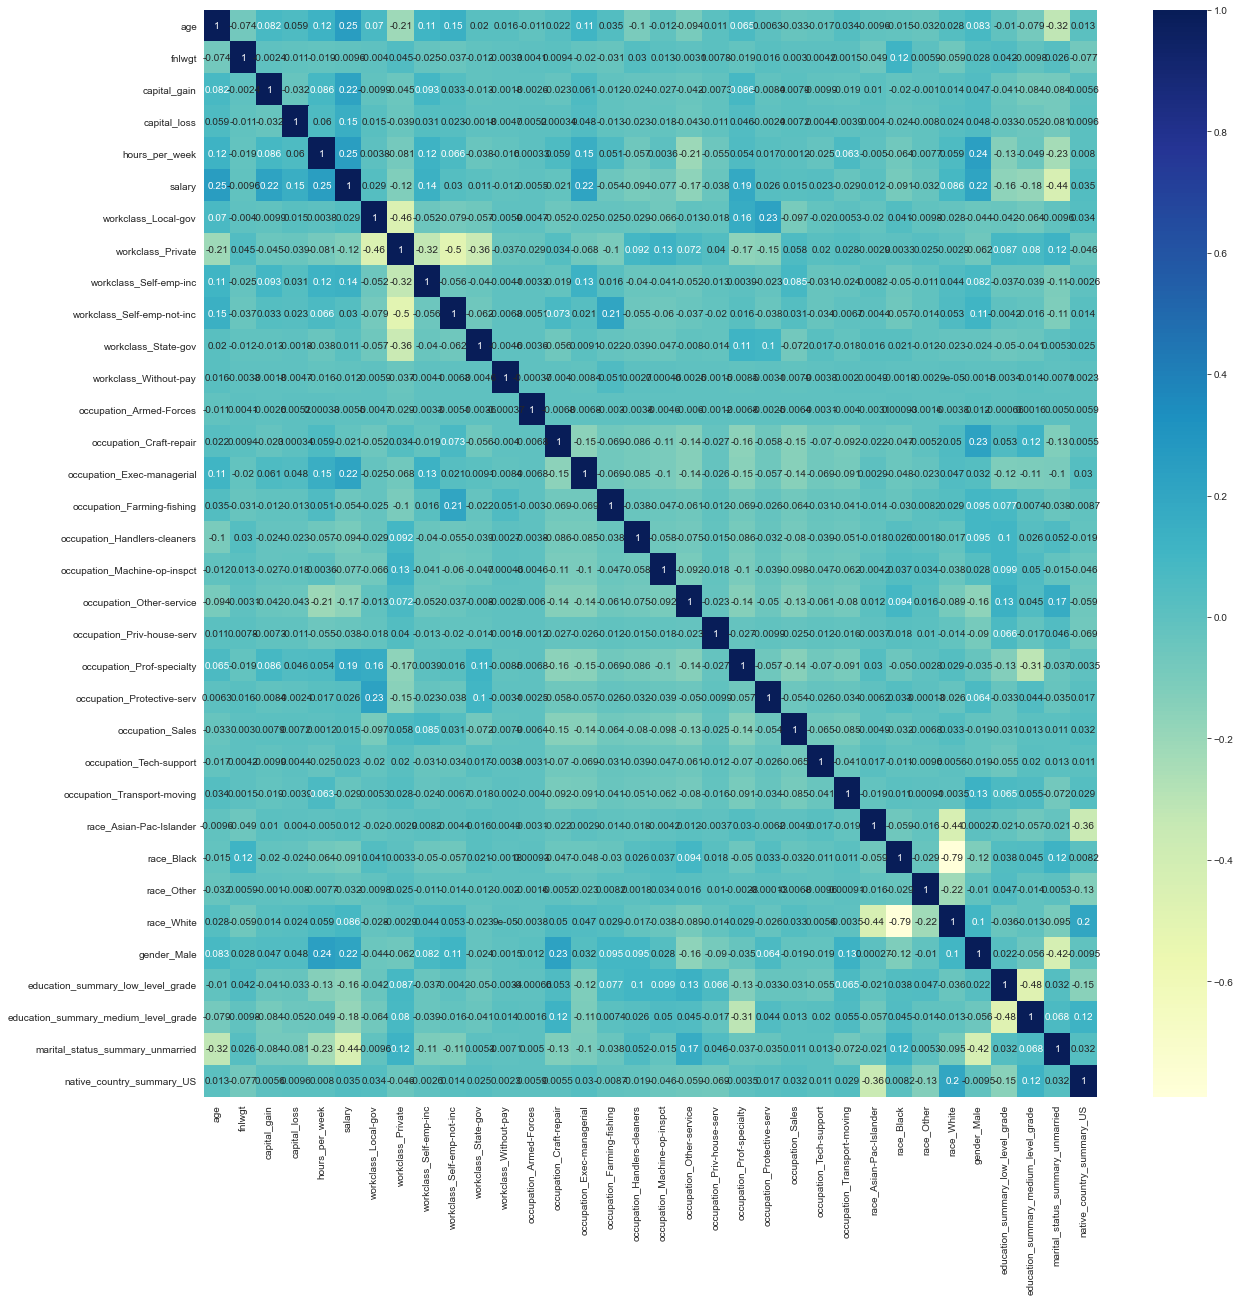

In [232]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_dummy.corr(), annot=True, cmap="YlGnBu");

In [233]:
df_dummy_corr_salary = df_dummy.corr()[["salary"]].drop("salary").sort_values(by = "salary", ascending = False)
df_dummy_corr_salary

,salary
age,0.253
hours_per_week,0.247
capital_gain,0.222
gender_Male,0.216
occupation_Exec-managerial,0.215
occupation_Prof-specialty,0.185
capital_loss,0.152
workclass_Self-emp-inc,0.138
race_White,0.086
native_country_summary_US,0.035


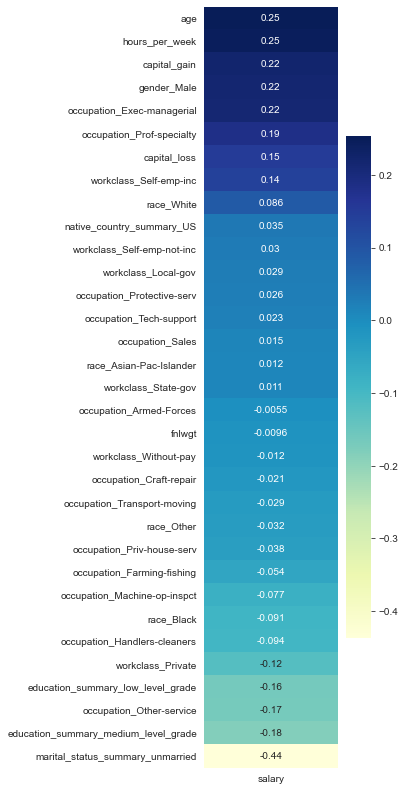

In [234]:
plt.figure(figsize = (3, 14))
sns.heatmap(df_dummy_corr_salary, annot = True, cmap = "YlGnBu")
plt.show()

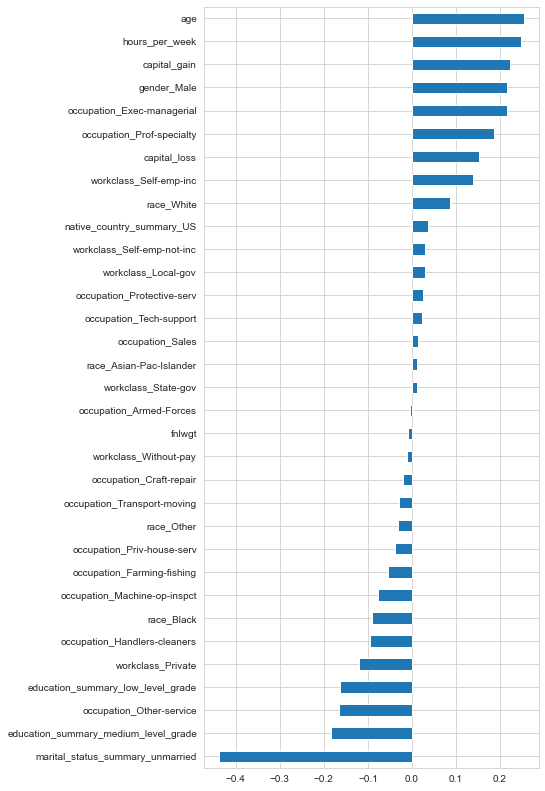

In [235]:
plt.figure(figsize = (6, 14))
df_dummy.corr()["salary"].drop("salary").sort_values().plot.barh();